<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>EXAMEN: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">EXAMEN PRÁCTICO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Examen Práctico de Interciclo
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

Primero se cargan las librerías necesarias para la ejecución de todo el programa

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, mean_absolute_error

Para la primera parte se pide realizar el análisis de las redes sociales del alcual presidente. En este caso se realizará el análisis de sus tweets en su cuenta oficial de Twitter https://twitter.com/LassoGuillermo. Para la extracción de la información se utilizó la herramienta Octaparse, que permite hacer web scraping de forma automática. Los datos recolectados se guardaron en el archivo Data.csv, y corresponden a:

- El usuario que realiza la publicación
- La Fecha en la que se realiza la publicación
- El texto del tweet publicado
- El número de comentarios
- El número de veces que la publicación fue compartida
- El número de likes

Como primer paso se procede a aplicar técnicas Deprocesamiento de Lenguaje Natural (NPL) en la columna de los Tweets. En primer lugar se procede a eliminar información innecesaria como signos de puntuación (.,:) y saltos de línea (\n). Posteriormente se convierte todo el texto a minúsculas (Lowercase).

Luego se realiza un análisis de la información para obtener nuevos datos de interés como:

- El número de palabras que contiene la publicación
- La cantidad de etiquetas en la publicación
- El número de HashTags usados en la publicación

Y finalmente se ordena la información obtenida en base al número de "Likes" de cada publicación (de menor a mayor).

In [2]:
df = pd.read_csv('Data.csv')
df['Tweet'] = [str(tweet).strip().replace('.', '').replace(':', '').replace('\n', '') for tweet in df['Tweet']]
df['Tweet'] = df['Tweet'].str.lower()
df['Comment'] = [comment.replace('.','').replace('K','')+'00' if '.' in comment else comment.replace('K','')+'000' if 'K' in comment else comment for comment in df['Comment']]
df['Share'] = [share.replace('.','').replace('K','')+'00' if '.' in share else share.replace('K','')+'000' if 'K' in share else share for share in df['Share']]
df['Like'] = [like.replace('.','').replace('K','')+'00' if '.' in like else like.replace('K','')+'000' if 'K' in like else like for like in df['Like']]
df['Like'] = df['Like'].apply(pd.to_numeric)
df['#Words'] = [len(str(tweet).split(' ')) for tweet in df['Tweet']]
df['#HashTags'] = [len(str(tweet).split('#'))-1 for tweet in df['Tweet']]
df['#Tags'] = [len(str(tweet).split('@'))-1 for tweet in df['Tweet']]

df = df.sort_values(by=['Like']).reset_index(drop=True)

Otro dato interesante se obtiene a través del análisis de palabras utilizadas en cada Tweet. Por medio de la librería NLTK, que permite realizar NPL, se consigue una lista de las palabras más frecuentes utilizadas en todas las publicaciones. Para ello se omiten las Stopwords, que son palabras que carecen de información relevante, sin embargo tienden a repetirse más en la oración como los artículos (él, la, ellos). Una vez que se obtiene la lista de palabras más frecuentes se agrega una nueva columna al DataSet con la cantidad de veces que la publicación ha usado las palabras de esta lista.

In [3]:
tweets = [word for word in " ".join(df["Tweet"]).split() if word not in stopwords.words('spanish')]
words = Counter(tweets).most_common(20)
freq = [i[0] for i in words]
Frequency = [len([i for i in freq if i in tweet]) for tweet in df['Tweet']]
df['Frequency'] = Frequency
df.head(15)

User    Date  \
0                  Guillermo Lasso  10-Mar   
1                      AsíAmaneció   8-Mar   
2   Red de Periodistas Libres #RPL   9-Mar   
3          Movimiento CREO Ecuador   9-Feb   
4                  Guillermo Lasso  11-Mar   
5                    Josué Sanchez   4-Feb   
6                  Guillermo Lasso   9-Mar   
7                  Guillermo Lasso  23-Feb   
8                  Guillermo Lasso  11-Mar   
9                  Guillermo Lasso   7-Feb   
10            Cámara de Industrias  11-Mar   
11                 Guillermo Lasso   8-Mar   
12             María Elena Machuca   3-May   
13                 Guillermo Lasso   8-Mar   
14                 Guillermo Lasso   8-Mar   

                                                Tweet Comment Share  Like  \
0   garantizaremos la transparencia y mecanismos d...      16    17    70   
1   al aire periodistas ecuatorianas mujeres parti...      22    41   167   
2   #buenasnoches | a las 2000, miembros de la @rp...      14    42   178   
3   el 135% del total de las actas representa a 1,...      43    55   230   
4   encuentros como este enriquecen al país trabaj...      25    91   298   
5   ¡#guayaquil votará por el equipo del cambio! e...      12    74   317   
6   muchas gracias a los ganaderos que asistieron ...      25    64   326   
7   muchas gracias a quienes se conectaron al en v...      41    39   351   
8   hoy a las 17h00, #encontrémonosporlaruralidad ...      47   108   376   
9   ¡ahora! rueda de prensa sobre las elecciones d...      52    56   397   
10  hoy nos acompaña el candidato a la presidencia...      26   106   408   
11  la cooperación internacional debe de tener un ...      31   107   417   
12  presidente @lassoguillermo el camino está traz...      40    87   428   
13  implementaremos mecanismos de protección, denu...      38   127   441   
14  gracias a @wqradio_ec por la invitación a este...      50   128   442   

    #Words  #HashTags  #Tags  Frequency  
0       28          0      0          1  
1       21          1      2          0  
2       27          6      3          1  
3       34          1      0          1  
4       36          0      0          5  
5       39          3      0          9  
6       25          1      0          4  
7       19          0      0          2  
8        7          1      0          1  
9       11          1      0          1  
10      21          0      1          2  
11      32          1      0          3  
12      27          1      1          2  
13      38          1      0          2  
14      33          1      1          2

Las colunmnas que se utilizarán como datos de entrada para nuestra regresión serán entonces:

- El número de palabras del tweet
- El número de HashTags usados
- La cantidad de etiquetas
- La cantidad de palabras frecuentes usadas

La variable de salida que se intentará predecir será la cantidad de Likes que la publicación obtendrá.

Para el entrenamiento del sistema se divide entonces las variables de entrada y de salida en Train y Test para la entapa de entrenamiento y pruebas en un 80 y 20% respectivamente. 

In [4]:
TRwords, TSwords, TRhashtags, TShashtags, TRtags, TStags, TRfreq, TSfreq, TRlikes, TSlikes = tts(df['#Words'], df['#HashTags'], df['#Tags'], df['Frequency'], df['Like'], test_size=0.2)

In [5]:
X = pd.DataFrame([TRwords, TRhashtags, TRtags, TRfreq]).T

Como se tienen cuatro parámetros de entrada, se realiza una reducción de dimensionalidad con el fin de tener una sola entrada y de esta forma realizar las gráficas respectivas en 2 dimensiones. Para esto se utiliza la técnica de SVD.

In [6]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X) 
var = svd.explained_variance_ratio_
X_svd = pd.DataFrame(data = X_svd)
X_svd = X_svd.sort_values(by=[0]).values

La regresión se realiza por medio de una máquina de vectores de soporte (SVM) que permite realizar un aprendizaje de máquina supervisado. En este caso se utilizó un kernel lineal.

In [7]:
clf=SVC(C=1,kernel="linear")
clf.fit(X_svd, TRlikes)
pred = clf.predict(X_svd)

En la gráfica se muestra la comparación de los datos reales vs. los predecidos con los datos de entrenamiento.

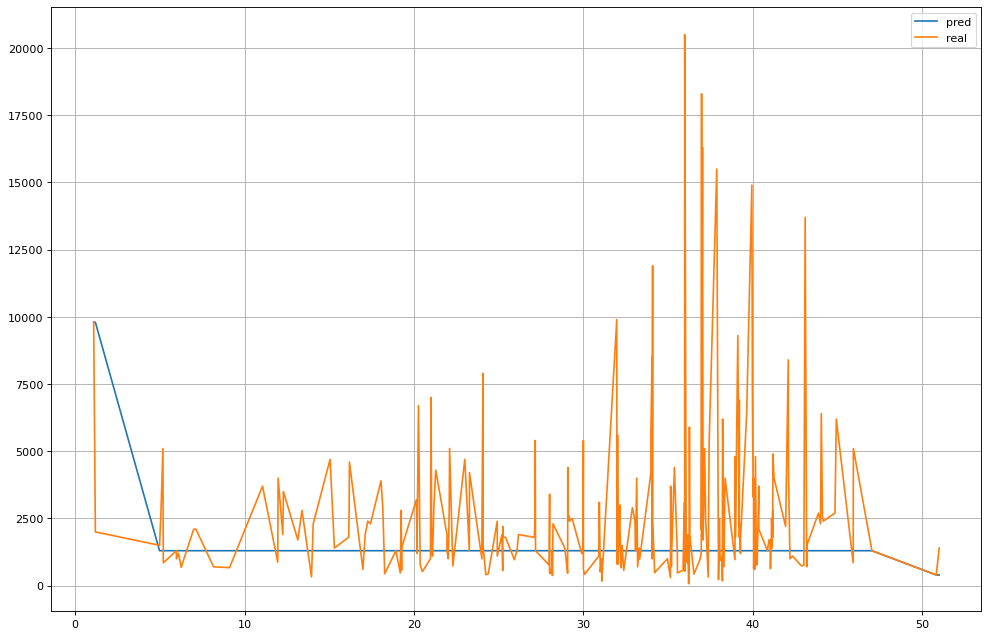

In [8]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(X_svd, pred, label='pred')
plt.plot(X_svd, TRlikes, label='real')
plt.legend()
plt.grid()
plt.show()

Se procede a realizar la predicción de datos con los datos reservados previamente para las pruebas.

In [9]:
Xpred = pd.DataFrame([TSwords, TShashtags, TStags, TSfreq]).T

In [10]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
Xpred_svd = svd.fit_transform(Xpred) 
var = svd.explained_variance_ratio_
Xpred_svd = pd.DataFrame(data = Xpred_svd)
Xpred_svd = Xpred_svd.sort_values(by=[0]).values

In [11]:
pred = clf.predict(Xpred_svd)

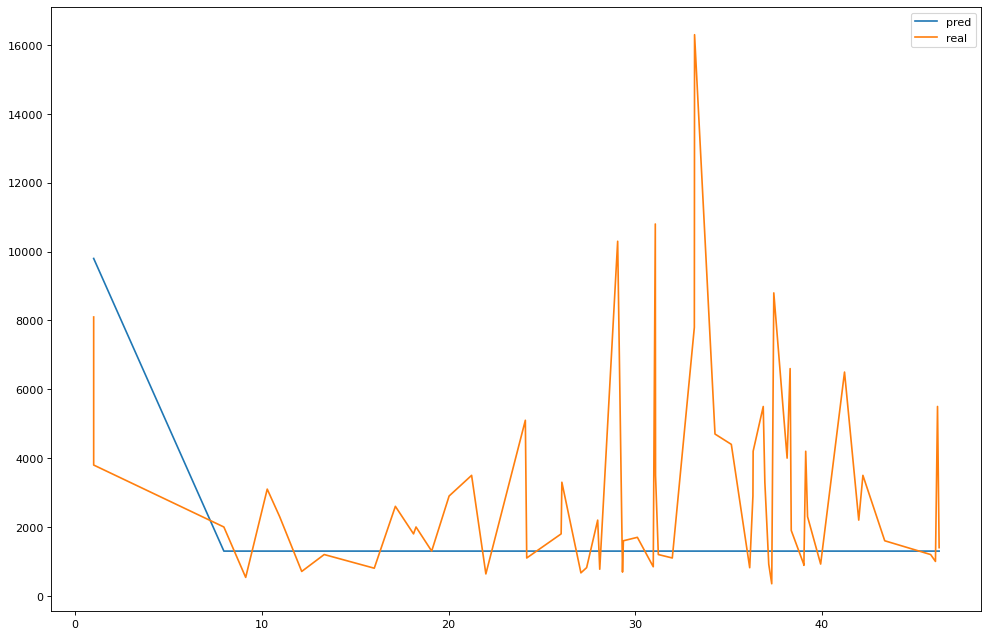

In [12]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(Xpred_svd, pred, label='pred')
plt.plot(Xpred_svd, TSlikes, label='real')
plt.legend()
plt.show()

Como se puede ver en la gráfica, la predicción realizada por el algoritmo no es la mejor. Se puede decir que los parámetros de entrada escogidos no son los que definen cuál será la aceptación de la publicación. A continuación se presenta el Error Cuadrado Medio y el Error Absoluto Medio de las predicciones realizadas.

In [13]:
mse = mean_squared_error(TSlikes, pred)
mse

11921138.098360656

In [14]:
mae = mean_absolute_error(TSlikes, pred)
mae

2080.2950819672133

### Simulación sistema de vacunación

In [15]:
import simpy
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Se toma uno de los recintos en la parroquia El Batán de Cuenca. En esta zona hay 12738 personas que deberán votar en uno de los tres Recintos Electorales [1]. Suponiendo que todas las personas se reparten equitativamente en los 3 recintos, en cada recinto se atenderán a 4246 personas. 

Puesto a que sólo el 80% de la población será vacunada, de las 4246 personas que deberían asistir al recinto, se espera que realmente asistan 3397 personas.

Puesto a que el horario de atención para la vacunación es de 08h00 a 17h00 [2], se define el tiempo de ejecución de la simulación diario en 540 (9 horas en minutos)

In [16]:
TIEMPO = 540
PUNTOS_VACUNACION0 = 6
PUNTOS_VACUNACION = 6
PUNTOS_VACUNACION2 = int(PUNTOS_VACUNACION/2)
DIAS = 100

vacunados1 = []
no_vacunados1 = []

s1 = 0
n1 = 0

vacunados2 = []
no_vacunados2 = []

s2 = 0
n2 = 0

class Centro_Covid(object):
    def __init__(self, env, puntos_vacunacion):
        self.env = env
        self.puntos_vacunacion = simpy.Resource(env, puntos_vacunacion)
        
    def poner_vacuna(self, paciente, dosis):
        global s1
        global s2
        print('> El %s va a vacunarse a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(5,10))
        print('> El %s ha sido vacunado a las %.2f. %s' % (paciente, env.now, dosis))
        if '1' in dosis:
            s1+=1
        else:
            s2+=1
    
    def esperar(self, paciente, dosis):
        print('_  El %s comienza su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(20)
        print('_  El %s termina su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.process(self.certificar(paciente, dosis))
        
    def certificar(self, paciente, dosis):
        print('@   El %s va a recibir su certificado a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(2,3))
        print('@   El %s ha recibido su certificado a las %.2f. %s y sale del recinto' % (paciente, env.now, dosis))
        
def llega_paciente(env, paciente, centro_covid, dosis):
    global n1
    global n2
    print('El %s llega al centro de vacunación a las %.2f. %s' % (paciente, env.now, dosis))
    with centro_covid.puntos_vacunacion.request() as punto_vacunacion:
        if random.randint(1,10) < 9:
            yield punto_vacunacion
            yield env.process(centro_covid.poner_vacuna(paciente, dosis))
            env.process(centro_covid.esperar(paciente, dosis))
        else:
            print('! El %s no ha podido vacunarse la %s y sale del recinto a las %.2f.' % (paciente, dosis, env.now))
            if '1' in dosis:
                n1+=1
            else:
                n2+=1

def ejecutar(env, puntos_vacunacion, dosis):
    centro_covid = Centro_Covid(env, puntos_vacunacion)
    for i in range(PUNTOS_VACUNACION):
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
        
    while True:
        yield env.timeout(random.randint(1,5))
        i+=1
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
    
random.seed(88)

for i in range(100):
    print()
    print('------ DÍA ' + str(i+1) + ' ------')
    print()
    
    s1 = 0
    n1 = 0
    s2 = 0
    n2 = 0
    
    env = simpy.Environment()
    if i >= 30:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '2da dosis'))
        if sum(vacunados1) < 3397:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION2
        else:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION0
    
    if sum(vacunados1) < 3397:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '1ra dosis'))

        
    env.run(until=TIEMPO)
    
    vacunados1.append(s1)
    no_vacunados1.append(n1)
    vacunados2.append(s2)
    no_vacunados2.append(n2)



------ DÍA 1 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 5 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 0.00. 1ra dosis
El Paciente 7 llega al centro de vacunación a las 4.00. 1ra dosis
> El Paciente 7 va a vacunarse a las 4.00. 1ra dosis
El Paciente 8 llega al centro de vacunación a las 5.00. 1ra dosis
> El Paciente 4 ha sido vacunado a las 6.00. 1ra 

> El Paciente 114 ha sido vacunado a las 335.00. 1ra dosis
_  El Paciente 114 comienza su tiempo de espera a las 335.00. 1ra dosis
_  El Paciente 107 termina su tiempo de espera a las 337.00. 1ra dosis
@   El Paciente 107 va a recibir su certificado a las 337.00. 1ra dosis
El Paciente 117 llega al centro de vacunación a las 337.00. 1ra dosis
> El Paciente 117 va a vacunarse a las 337.00. 1ra dosis
_  El Paciente 106 termina su tiempo de espera a las 338.00. 1ra dosis
@   El Paciente 106 va a recibir su certificado a las 338.00. 1ra dosis
> El Paciente 115 ha sido vacunado a las 338.00. 1ra dosis
_  El Paciente 115 comienza su tiempo de espera a las 338.00. 1ra dosis
@   El Paciente 107 ha recibido su certificado a las 339.00. 1ra dosis y sale del recinto
_  El Paciente 108 termina su tiempo de espera a las 340.00. 1ra dosis
@   El Paciente 108 va a recibir su certificado a las 340.00. 1ra dosis
El Paciente 118 llega al centro de vacunación a las 341.00. 1ra dosis
@   El Paciente 106 ha

_  El Paciente 114 comienza su tiempo de espera a las 364.00. 1ra dosis
El Paciente 116 llega al centro de vacunación a las 365.00. 1ra dosis
> El Paciente 116 va a vacunarse a las 365.00. 1ra dosis
_  El Paciente 109 termina su tiempo de espera a las 366.00. 1ra dosis
@   El Paciente 109 va a recibir su certificado a las 366.00. 1ra dosis
_  El Paciente 110 termina su tiempo de espera a las 366.00. 1ra dosis
@   El Paciente 110 va a recibir su certificado a las 366.00. 1ra dosis
El Paciente 117 llega al centro de vacunación a las 367.00. 1ra dosis
> El Paciente 117 va a vacunarse a las 367.00. 1ra dosis
@   El Paciente 109 ha recibido su certificado a las 368.00. 1ra dosis y sale del recinto
@   El Paciente 110 ha recibido su certificado a las 368.00. 1ra dosis y sale del recinto
> El Paciente 115 ha sido vacunado a las 370.00. 1ra dosis
_  El Paciente 115 comienza su tiempo de espera a las 370.00. 1ra dosis
_  El Paciente 111 termina su tiempo de espera a las 371.00. 1ra dosis
@   El

El Paciente 14 llega al centro de vacunación a las 19.00. 1ra dosis
> El Paciente 14 va a vacunarse a las 19.00. 1ra dosis
El Paciente 15 llega al centro de vacunación a las 20.00. 1ra dosis
> El Paciente 15 va a vacunarse a las 20.00. 1ra dosis
El Paciente 16 llega al centro de vacunación a las 21.00. 1ra dosis
> El Paciente 16 va a vacunarse a las 21.00. 1ra dosis
> El Paciente 13 ha sido vacunado a las 24.00. 1ra dosis
_  El Paciente 13 comienza su tiempo de espera a las 24.00. 1ra dosis
_  El Paciente 3 termina su tiempo de espera a las 26.00. 1ra dosis
@   El Paciente 3 va a recibir su certificado a las 26.00. 1ra dosis
_  El Paciente 5 termina su tiempo de espera a las 26.00. 1ra dosis
@   El Paciente 5 va a recibir su certificado a las 26.00. 1ra dosis
El Paciente 17 llega al centro de vacunación a las 26.00. 1ra dosis
> El Paciente 17 va a vacunarse a las 26.00. 1ra dosis
_  El Paciente 4 termina su tiempo de espera a las 27.00. 1ra dosis
@   El Paciente 4 va a recibir su certi

> El Paciente 65 ha sido vacunado a las 185.00. 1ra dosis
_  El Paciente 65 comienza su tiempo de espera a las 185.00. 1ra dosis
_  El Paciente 56 termina su tiempo de espera a las 186.00. 1ra dosis
@   El Paciente 56 va a recibir su certificado a las 186.00. 1ra dosis
@   El Paciente 56 ha recibido su certificado a las 188.00. 1ra dosis y sale del recinto
_  El Paciente 58 termina su tiempo de espera a las 189.00. 1ra dosis
@   El Paciente 58 va a recibir su certificado a las 189.00. 1ra dosis
_  El Paciente 59 termina su tiempo de espera a las 189.00. 1ra dosis
@   El Paciente 59 va a recibir su certificado a las 189.00. 1ra dosis
El Paciente 68 llega al centro de vacunación a las 189.00. 1ra dosis
> El Paciente 68 va a vacunarse a las 189.00. 1ra dosis
El Paciente 69 llega al centro de vacunación a las 190.00. 1ra dosis
> El Paciente 69 va a vacunarse a las 190.00. 1ra dosis
@   El Paciente 58 ha recibido su certificado a las 191.00. 1ra dosis y sale del recinto
@   El Paciente 59 h

_  El Paciente 96 termina su tiempo de espera a las 290.00. 1ra dosis
@   El Paciente 96 va a recibir su certificado a las 290.00. 1ra dosis
> El Paciente 106 ha sido vacunado a las 290.00. 1ra dosis
El Paciente 109 llega al centro de vacunación a las 290.00. 1ra dosis
_  El Paciente 106 comienza su tiempo de espera a las 290.00. 1ra dosis
> El Paciente 109 va a vacunarse a las 290.00. 1ra dosis
_  El Paciente 97 termina su tiempo de espera a las 291.00. 1ra dosis
@   El Paciente 97 va a recibir su certificado a las 291.00. 1ra dosis
_  El Paciente 98 termina su tiempo de espera a las 292.00. 1ra dosis
@   El Paciente 98 va a recibir su certificado a las 292.00. 1ra dosis
> El Paciente 107 ha sido vacunado a las 292.00. 1ra dosis
El Paciente 110 llega al centro de vacunación a las 292.00. 1ra dosis
! El Paciente 110 no ha podido vacunarse la 1ra dosis y sale del recinto a las 292.00.
_  El Paciente 107 comienza su tiempo de espera a las 292.00. 1ra dosis
_  El Paciente 99 termina su ti

El Paciente 88 llega al centro de vacunación a las 258.00. 1ra dosis
> El Paciente 88 va a vacunarse a las 258.00. 1ra dosis
_  El Paciente 76 termina su tiempo de espera a las 259.00. 1ra dosis
@   El Paciente 76 va a recibir su certificado a las 259.00. 1ra dosis
> El Paciente 86 ha sido vacunado a las 261.00. 1ra dosis
El Paciente 89 llega al centro de vacunación a las 261.00. 1ra dosis
@   El Paciente 76 ha recibido su certificado a las 261.00. 1ra dosis y sale del recinto
_  El Paciente 86 comienza su tiempo de espera a las 261.00. 1ra dosis
> El Paciente 89 va a vacunarse a las 261.00. 1ra dosis
_  El Paciente 78 termina su tiempo de espera a las 263.00. 1ra dosis
@   El Paciente 78 va a recibir su certificado a las 263.00. 1ra dosis
_  El Paciente 79 termina su tiempo de espera a las 263.00. 1ra dosis
@   El Paciente 79 va a recibir su certificado a las 263.00. 1ra dosis
@   El Paciente 78 ha recibido su certificado a las 265.00. 1ra dosis y sale del recinto
@   El Paciente 79 h

> El Paciente 134 ha sido vacunado a las 411.00. 1ra dosis
El Paciente 137 llega al centro de vacunación a las 411.00. 1ra dosis
_  El Paciente 134 comienza su tiempo de espera a las 411.00. 1ra dosis
> El Paciente 137 va a vacunarse a las 411.00. 1ra dosis
El Paciente 138 llega al centro de vacunación a las 413.00. 1ra dosis
> El Paciente 138 va a vacunarse a las 413.00. 1ra dosis
_  El Paciente 130 termina su tiempo de espera a las 417.00. 1ra dosis
@   El Paciente 130 va a recibir su certificado a las 417.00. 1ra dosis
> El Paciente 135 ha sido vacunado a las 417.00. 1ra dosis
> El Paciente 136 ha sido vacunado a las 417.00. 1ra dosis
El Paciente 139 llega al centro de vacunación a las 417.00. 1ra dosis
_  El Paciente 135 comienza su tiempo de espera a las 417.00. 1ra dosis
_  El Paciente 136 comienza su tiempo de espera a las 417.00. 1ra dosis
> El Paciente 139 va a vacunarse a las 417.00. 1ra dosis
> El Paciente 137 ha sido vacunado a las 418.00. 1ra dosis
> El Paciente 138 ha sid

El Paciente 161 llega al centro de vacunación a las 458.00. 1ra dosis
> El Paciente 161 va a vacunarse a las 458.00. 1ra dosis
_  El Paciente 153 termina su tiempo de espera a las 459.00. 1ra dosis
@   El Paciente 153 va a recibir su certificado a las 459.00. 1ra dosis
El Paciente 162 llega al centro de vacunación a las 459.00. 1ra dosis
> El Paciente 162 va a vacunarse a las 459.00. 1ra dosis
@   El Paciente 153 ha recibido su certificado a las 462.00. 1ra dosis y sale del recinto
El Paciente 163 llega al centro de vacunación a las 463.00. 1ra dosis
> El Paciente 163 va a vacunarse a las 463.00. 1ra dosis
> El Paciente 162 ha sido vacunado a las 466.00. 1ra dosis
El Paciente 164 llega al centro de vacunación a las 466.00. 1ra dosis
_  El Paciente 162 comienza su tiempo de espera a las 466.00. 1ra dosis
> El Paciente 164 va a vacunarse a las 466.00. 1ra dosis
> El Paciente 161 ha sido vacunado a las 467.00. 1ra dosis
_  El Paciente 161 comienza su tiempo de espera a las 467.00. 1ra dos

! El Paciente 56 no ha podido vacunarse la 1ra dosis y sale del recinto a las 139.00.
@   El Paciente 46 ha recibido su certificado a las 139.00. 1ra dosis y sale del recinto
@   El Paciente 47 ha recibido su certificado a las 140.00. 1ra dosis y sale del recinto
El Paciente 57 llega al centro de vacunación a las 140.00. 1ra dosis
> El Paciente 57 va a vacunarse a las 140.00. 1ra dosis
> El Paciente 54 ha sido vacunado a las 142.00. 1ra dosis
El Paciente 58 llega al centro de vacunación a las 142.00. 1ra dosis
_  El Paciente 54 comienza su tiempo de espera a las 142.00. 1ra dosis
> El Paciente 58 va a vacunarse a las 142.00. 1ra dosis
> El Paciente 55 ha sido vacunado a las 143.00. 1ra dosis
_  El Paciente 55 comienza su tiempo de espera a las 143.00. 1ra dosis
El Paciente 59 llega al centro de vacunación a las 144.00. 1ra dosis
! El Paciente 59 no ha podido vacunarse la 1ra dosis y sale del recinto a las 144.00.
_  El Paciente 48 termina su tiempo de espera a las 146.00. 1ra dosis
@  

@   El Paciente 155 va a recibir su certificado a las 452.00. 1ra dosis
_  El Paciente 157 termina su tiempo de espera a las 453.00. 1ra dosis
@   El Paciente 157 va a recibir su certificado a las 453.00. 1ra dosis
> El Paciente 163 ha sido vacunado a las 454.00. 1ra dosis
_  El Paciente 163 comienza su tiempo de espera a las 454.00. 1ra dosis
_  El Paciente 158 termina su tiempo de espera a las 455.00. 1ra dosis
@   El Paciente 158 va a recibir su certificado a las 455.00. 1ra dosis
El Paciente 165 llega al centro de vacunación a las 455.00. 1ra dosis
! El Paciente 165 no ha podido vacunarse la 1ra dosis y sale del recinto a las 455.00.
@   El Paciente 155 ha recibido su certificado a las 455.00. 1ra dosis y sale del recinto
@   El Paciente 157 ha recibido su certificado a las 455.00. 1ra dosis y sale del recinto
_  El Paciente 159 termina su tiempo de espera a las 456.00. 1ra dosis
@   El Paciente 159 va a recibir su certificado a las 456.00. 1ra dosis
@   El Paciente 158 ha recibido

_  El Paciente 188 comienza su tiempo de espera a las 524.00. 1ra dosis
_  El Paciente 180 termina su tiempo de espera a las 525.00. 1ra dosis
@   El Paciente 180 va a recibir su certificado a las 525.00. 1ra dosis
El Paciente 190 llega al centro de vacunación a las 528.00. 1ra dosis
@   El Paciente 180 ha recibido su certificado a las 528.00. 1ra dosis y sale del recinto
> El Paciente 190 va a vacunarse a las 528.00. 1ra dosis
_  El Paciente 182 termina su tiempo de espera a las 529.00. 1ra dosis
@   El Paciente 182 va a recibir su certificado a las 529.00. 1ra dosis
El Paciente 191 llega al centro de vacunación a las 530.00. 1ra dosis
! El Paciente 191 no ha podido vacunarse la 1ra dosis y sale del recinto a las 530.00.
> El Paciente 189 ha sido vacunado a las 531.00. 1ra dosis
_  El Paciente 189 comienza su tiempo de espera a las 531.00. 1ra dosis
@   El Paciente 182 ha recibido su certificado a las 532.00. 1ra dosis y sale del recinto
> El Paciente 190 ha sido vacunado a las 533.00

> El Paciente 53 ha sido vacunado a las 146.00. 1ra dosis
@   El Paciente 44 ha recibido su certificado a las 146.00. 1ra dosis y sale del recinto
_  El Paciente 53 comienza su tiempo de espera a las 146.00. 1ra dosis
@   El Paciente 46 ha recibido su certificado a las 147.00. 1ra dosis y sale del recinto
El Paciente 56 llega al centro de vacunación a las 147.00. 1ra dosis
> El Paciente 56 va a vacunarse a las 147.00. 1ra dosis
@   El Paciente 45 ha recibido su certificado a las 148.00. 1ra dosis y sale del recinto
> El Paciente 54 ha sido vacunado a las 149.00. 1ra dosis
_  El Paciente 54 comienza su tiempo de espera a las 149.00. 1ra dosis
> El Paciente 55 ha sido vacunado a las 150.00. 1ra dosis
_  El Paciente 55 comienza su tiempo de espera a las 150.00. 1ra dosis
El Paciente 57 llega al centro de vacunación a las 152.00. 1ra dosis
> El Paciente 57 va a vacunarse a las 152.00. 1ra dosis
_  El Paciente 48 termina su tiempo de espera a las 153.00. 1ra dosis
@   El Paciente 48 va a re

> El Paciente 59 va a vacunarse a las 172.00. 1ra dosis
_  El Paciente 51 termina su tiempo de espera a las 173.00. 1ra dosis
@   El Paciente 51 va a recibir su certificado a las 173.00. 1ra dosis
_  El Paciente 53 termina su tiempo de espera a las 173.00. 1ra dosis
@   El Paciente 53 va a recibir su certificado a las 173.00. 1ra dosis
El Paciente 60 llega al centro de vacunación a las 174.00. 1ra dosis
! El Paciente 60 no ha podido vacunarse la 1ra dosis y sale del recinto a las 174.00.
_  El Paciente 54 termina su tiempo de espera a las 175.00. 1ra dosis
@   El Paciente 54 va a recibir su certificado a las 175.00. 1ra dosis
@   El Paciente 53 ha recibido su certificado a las 175.00. 1ra dosis y sale del recinto
@   El Paciente 51 ha recibido su certificado a las 176.00. 1ra dosis y sale del recinto
El Paciente 61 llega al centro de vacunación a las 177.00. 1ra dosis
@   El Paciente 54 ha recibido su certificado a las 177.00. 1ra dosis y sale del recinto
> El Paciente 61 va a vacunars

@   El Paciente 34 va a recibir su certificado a las 123.00. 1ra dosis
El Paciente 42 llega al centro de vacunación a las 123.00. 1ra dosis
> El Paciente 42 va a vacunarse a las 123.00. 1ra dosis
@   El Paciente 34 ha recibido su certificado a las 125.00. 1ra dosis y sale del recinto
> El Paciente 41 ha sido vacunado a las 127.00. 1ra dosis
El Paciente 43 llega al centro de vacunación a las 127.00. 1ra dosis
_  El Paciente 41 comienza su tiempo de espera a las 127.00. 1ra dosis
> El Paciente 43 va a vacunarse a las 127.00. 1ra dosis
_  El Paciente 35 termina su tiempo de espera a las 130.00. 1ra dosis
@   El Paciente 35 va a recibir su certificado a las 130.00. 1ra dosis
_  El Paciente 36 termina su tiempo de espera a las 131.00. 1ra dosis
@   El Paciente 36 va a recibir su certificado a las 131.00. 1ra dosis
_  El Paciente 37 termina su tiempo de espera a las 131.00. 1ra dosis
@   El Paciente 37 va a recibir su certificado a las 131.00. 1ra dosis
El Paciente 44 llega al centro de vacu

@   El Paciente 16 ha recibido su certificado a las 58.00. 1ra dosis y sale del recinto
@   El Paciente 15 ha recibido su certificado a las 58.00. 1ra dosis y sale del recinto
_  El Paciente 22 comienza su tiempo de espera a las 58.00. 1ra dosis
_  El Paciente 23 comienza su tiempo de espera a las 58.00. 1ra dosis
El Paciente 26 llega al centro de vacunación a las 59.00. 1ra dosis
> El Paciente 26 va a vacunarse a las 59.00. 1ra dosis
> El Paciente 25 ha sido vacunado a las 61.00. 1ra dosis
El Paciente 27 llega al centro de vacunación a las 61.00. 1ra dosis
_  El Paciente 25 comienza su tiempo de espera a las 61.00. 1ra dosis
> El Paciente 27 va a vacunarse a las 61.00. 1ra dosis
El Paciente 28 llega al centro de vacunación a las 63.00. 1ra dosis
! El Paciente 28 no ha podido vacunarse la 1ra dosis y sale del recinto a las 63.00.
> El Paciente 24 ha sido vacunado a las 64.00. 1ra dosis
El Paciente 29 llega al centro de vacunación a las 64.00. 1ra dosis
_  El Paciente 24 comienza su tie

_  El Paciente 36 comienza su tiempo de espera a las 95.00. 1ra dosis
> El Paciente 40 va a vacunarse a las 95.00. 1ra dosis
@   El Paciente 31 ha recibido su certificado a las 96.00. 1ra dosis y sale del recinto
El Paciente 41 llega al centro de vacunación a las 97.00. 1ra dosis
> El Paciente 41 va a vacunarse a las 97.00. 1ra dosis
El Paciente 42 llega al centro de vacunación a las 99.00. 1ra dosis
> El Paciente 42 va a vacunarse a las 99.00. 1ra dosis
> El Paciente 40 ha sido vacunado a las 101.00. 1ra dosis
_  El Paciente 40 comienza su tiempo de espera a las 101.00. 1ra dosis
El Paciente 43 llega al centro de vacunación a las 102.00. 1ra dosis
> El Paciente 43 va a vacunarse a las 102.00. 1ra dosis
> El Paciente 41 ha sido vacunado a las 104.00. 1ra dosis
El Paciente 44 llega al centro de vacunación a las 104.00. 1ra dosis
! El Paciente 44 no ha podido vacunarse la 1ra dosis y sale del recinto a las 104.00.
_  El Paciente 41 comienza su tiempo de espera a las 104.00. 1ra dosis
_  

> El Paciente 36 va a vacunarse a las 100.00. 1ra dosis
> El Paciente 33 ha sido vacunado a las 101.00. 1ra dosis
> El Paciente 35 ha sido vacunado a las 101.00. 1ra dosis
@   El Paciente 27 ha recibido su certificado a las 101.00. 1ra dosis y sale del recinto
_  El Paciente 33 comienza su tiempo de espera a las 101.00. 1ra dosis
_  El Paciente 35 comienza su tiempo de espera a las 101.00. 1ra dosis
El Paciente 37 llega al centro de vacunación a las 103.00. 1ra dosis
> El Paciente 37 va a vacunarse a las 103.00. 1ra dosis
> El Paciente 36 ha sido vacunado a las 105.00. 1ra dosis
_  El Paciente 36 comienza su tiempo de espera a las 105.00. 1ra dosis
El Paciente 38 llega al centro de vacunación a las 108.00. 1ra dosis
> El Paciente 37 ha sido vacunado a las 108.00. 1ra dosis
> El Paciente 38 va a vacunarse a las 108.00. 1ra dosis
_  El Paciente 37 comienza su tiempo de espera a las 108.00. 1ra dosis
_  El Paciente 29 termina su tiempo de espera a las 111.00. 1ra dosis
@   El Paciente 29 

_  El Paciente 49 comienza su tiempo de espera a las 157.00. 1ra dosis
> El Paciente 50 ha sido vacunado a las 158.00. 1ra dosis
_  El Paciente 50 comienza su tiempo de espera a las 158.00. 1ra dosis
@   El Paciente 43 ha recibido su certificado a las 159.00. 1ra dosis y sale del recinto
> El Paciente 51 ha sido vacunado a las 161.00. 1ra dosis
El Paciente 53 llega al centro de vacunación a las 161.00. 1ra dosis
_  El Paciente 51 comienza su tiempo de espera a las 161.00. 1ra dosis
> El Paciente 53 va a vacunarse a las 161.00. 1ra dosis
> El Paciente 52 ha sido vacunado a las 162.00. 1ra dosis
_  El Paciente 52 comienza su tiempo de espera a las 162.00. 1ra dosis
El Paciente 54 llega al centro de vacunación a las 165.00. 1ra dosis
> El Paciente 54 va a vacunarse a las 165.00. 1ra dosis
_  El Paciente 45 termina su tiempo de espera a las 166.00. 1ra dosis
@   El Paciente 45 va a recibir su certificado a las 166.00. 1ra dosis
> El Paciente 53 ha sido vacunado a las 167.00. 1ra dosis
El P

_  El Paciente 127 comienza su tiempo de espera a las 384.00. 1ra dosis
_  El Paciente 121 termina su tiempo de espera a las 385.00. 1ra dosis
@   El Paciente 121 va a recibir su certificado a las 385.00. 1ra dosis
@   El Paciente 119 ha recibido su certificado a las 385.00. 1ra dosis y sale del recinto
@   El Paciente 120 ha recibido su certificado a las 386.00. 1ra dosis y sale del recinto
El Paciente 131 llega al centro de vacunación a las 386.00. 1ra dosis
! El Paciente 131 no ha podido vacunarse la 1ra dosis y sale del recinto a las 386.00.
@   El Paciente 121 ha recibido su certificado a las 387.00. 1ra dosis y sale del recinto
El Paciente 132 llega al centro de vacunación a las 387.00. 1ra dosis
> El Paciente 132 va a vacunarse a las 387.00. 1ra dosis
> El Paciente 128 ha sido vacunado a las 388.00. 1ra dosis
_  El Paciente 128 comienza su tiempo de espera a las 388.00. 1ra dosis
El Paciente 133 llega al centro de vacunación a las 390.00. 1ra dosis
> El Paciente 133 va a vacunar

> El Paciente 145 ha sido vacunado a las 428.00. 1ra dosis
El Paciente 147 llega al centro de vacunación a las 428.00. 1ra dosis
! El Paciente 147 no ha podido vacunarse la 1ra dosis y sale del recinto a las 428.00.
_  El Paciente 143 comienza su tiempo de espera a las 428.00. 1ra dosis
_  El Paciente 145 comienza su tiempo de espera a las 428.00. 1ra dosis
@   El Paciente 137 ha recibido su certificado a las 430.00. 1ra dosis y sale del recinto
El Paciente 148 llega al centro de vacunación a las 433.00. 1ra dosis
> El Paciente 148 va a vacunarse a las 433.00. 1ra dosis
> El Paciente 146 ha sido vacunado a las 434.00. 1ra dosis
_  El Paciente 146 comienza su tiempo de espera a las 434.00. 1ra dosis
_  El Paciente 139 termina su tiempo de espera a las 435.00. 1ra dosis
@   El Paciente 139 va a recibir su certificado a las 435.00. 1ra dosis
El Paciente 149 llega al centro de vacunación a las 435.00. 1ra dosis
> El Paciente 149 va a vacunarse a las 435.00. 1ra dosis
_  El Paciente 140 ter

@   El Paciente 18 ha recibido su certificado a las 59.00. 2da dosis y sale del recinto
_  El Paciente 19 termina su tiempo de espera a las 60.00. 2da dosis
@   El Paciente 19 va a recibir su certificado a las 60.00. 2da dosis
> El Paciente 26 ha sido vacunado a las 61.00. 2da dosis
El Paciente 28 llega al centro de vacunación a las 61.00. 2da dosis
_  El Paciente 26 comienza su tiempo de espera a las 61.00. 2da dosis
> El Paciente 28 va a vacunarse a las 61.00. 2da dosis
@   El Paciente 19 ha recibido su certificado a las 62.00. 2da dosis y sale del recinto
_  El Paciente 20 termina su tiempo de espera a las 63.00. 2da dosis
@   El Paciente 20 va a recibir su certificado a las 63.00. 2da dosis
_  El Paciente 21 termina su tiempo de espera a las 63.00. 2da dosis
@   El Paciente 21 va a recibir su certificado a las 63.00. 2da dosis
> El Paciente 27 ha sido vacunado a las 63.00. 2da dosis
_  El Paciente 27 comienza su tiempo de espera a las 63.00. 2da dosis
_  El Paciente 22 termina su t

_  El Paciente 93 comienza su tiempo de espera a las 259.00. 2da dosis
_  El Paciente 87 termina su tiempo de espera a las 260.00. 2da dosis
@   El Paciente 87 va a recibir su certificado a las 260.00. 2da dosis
El Paciente 95 llega al centro de vacunación a las 260.00. 2da dosis
> El Paciente 95 va a vacunarse a las 260.00. 2da dosis
@   El Paciente 87 ha recibido su certificado a las 263.00. 2da dosis y sale del recinto
El Paciente 96 llega al centro de vacunación a las 265.00. 2da dosis
! El Paciente 96 no ha podido vacunarse la 2da dosis y sale del recinto a las 265.00.
_  El Paciente 88 termina su tiempo de espera a las 267.00. 2da dosis
@   El Paciente 88 va a recibir su certificado a las 267.00. 2da dosis
El Paciente 97 llega al centro de vacunación a las 269.00. 2da dosis
@   El Paciente 88 ha recibido su certificado a las 269.00. 2da dosis y sale del recinto
> El Paciente 97 va a vacunarse a las 269.00. 2da dosis
> El Paciente 95 ha sido vacunado a las 270.00. 2da dosis
_  El 

El Paciente 145 llega al centro de vacunación a las 412.00. 2da dosis
> El Paciente 145 va a vacunarse a las 412.00. 2da dosis
_  El Paciente 136 termina su tiempo de espera a las 414.00. 2da dosis
@   El Paciente 136 va a recibir su certificado a las 414.00. 2da dosis
_  El Paciente 137 termina su tiempo de espera a las 415.00. 2da dosis
@   El Paciente 137 va a recibir su certificado a las 415.00. 2da dosis
> El Paciente 143 ha sido vacunado a las 415.00. 2da dosis
El Paciente 146 llega al centro de vacunación a las 415.00. 2da dosis
_  El Paciente 143 comienza su tiempo de espera a las 415.00. 2da dosis
> El Paciente 146 va a vacunarse a las 415.00. 2da dosis
@   El Paciente 136 ha recibido su certificado a las 416.00. 2da dosis y sale del recinto
El Paciente 147 llega al centro de vacunación a las 417.00. 2da dosis
> El Paciente 147 va a vacunarse a las 417.00. 2da dosis
@   El Paciente 137 ha recibido su certificado a las 418.00. 2da dosis y sale del recinto
> El Paciente 144 ha s

@   El Paciente 154 ha recibido su certificado a las 477.00. 2da dosis y sale del recinto
> El Paciente 164 va a vacunarse a las 477.00. 2da dosis
_  El Paciente 156 termina su tiempo de espera a las 478.00. 2da dosis
@   El Paciente 156 va a recibir su certificado a las 478.00. 2da dosis
_  El Paciente 157 termina su tiempo de espera a las 478.00. 2da dosis
@   El Paciente 157 va a recibir su certificado a las 478.00. 2da dosis
@   El Paciente 156 ha recibido su certificado a las 481.00. 2da dosis y sale del recinto
@   El Paciente 157 ha recibido su certificado a las 481.00. 2da dosis y sale del recinto
El Paciente 165 llega al centro de vacunación a las 482.00. 2da dosis
> El Paciente 165 va a vacunarse a las 482.00. 2da dosis
> El Paciente 163 ha sido vacunado a las 483.00. 2da dosis
_  El Paciente 163 comienza su tiempo de espera a las 483.00. 2da dosis
> El Paciente 164 ha sido vacunado a las 484.00. 2da dosis
_  El Paciente 164 comienza su tiempo de espera a las 484.00. 2da dosi

_  El Paciente 3 comienza su tiempo de espera a las 8.00. 2da dosis
> El Paciente 9 va a vacunarse a las 8.00. 2da dosis
> El Paciente 2 ha sido vacunado a las 9.00. 2da dosis
> El Paciente 4 ha sido vacunado a las 9.00. 2da dosis
_  El Paciente 2 comienza su tiempo de espera a las 9.00. 2da dosis
_  El Paciente 4 comienza su tiempo de espera a las 9.00. 2da dosis
> El Paciente 6 ha sido vacunado a las 10.00. 2da dosis
_  El Paciente 6 comienza su tiempo de espera a las 10.00. 2da dosis
> El Paciente 7 ha sido vacunado a las 11.00. 2da dosis
El Paciente 10 llega al centro de vacunación a las 11.00. 2da dosis
_  El Paciente 7 comienza su tiempo de espera a las 11.00. 2da dosis
> El Paciente 10 va a vacunarse a las 11.00. 2da dosis
El Paciente 11 llega al centro de vacunación a las 12.00. 2da dosis
> El Paciente 11 va a vacunarse a las 12.00. 2da dosis
> El Paciente 9 ha sido vacunado a las 13.00. 2da dosis
_  El Paciente 9 comienza su tiempo de espera a las 13.00. 2da dosis
El Paciente 

El Paciente 97 llega al centro de vacunación a las 299.00. 2da dosis
> El Paciente 97 va a vacunarse a las 299.00. 2da dosis
> El Paciente 93 ha sido vacunado a las 300.00. 2da dosis
_  El Paciente 93 comienza su tiempo de espera a las 300.00. 2da dosis
> El Paciente 94 ha sido vacunado a las 301.00. 2da dosis
@   El Paciente 88 ha recibido su certificado a las 301.00. 2da dosis y sale del recinto
_  El Paciente 94 comienza su tiempo de espera a las 301.00. 2da dosis
> El Paciente 95 ha sido vacunado a las 302.00. 2da dosis
El Paciente 98 llega al centro de vacunación a las 302.00. 2da dosis
_  El Paciente 95 comienza su tiempo de espera a las 302.00. 2da dosis
> El Paciente 98 va a vacunarse a las 302.00. 2da dosis
_  El Paciente 89 termina su tiempo de espera a las 304.00. 2da dosis
@   El Paciente 89 va a recibir su certificado a las 304.00. 2da dosis
> El Paciente 97 ha sido vacunado a las 305.00. 2da dosis
_  El Paciente 97 comienza su tiempo de espera a las 305.00. 2da dosis
_  E

_  El Paciente 111 termina su tiempo de espera a las 339.00. 2da dosis
@   El Paciente 111 va a recibir su certificado a las 339.00. 2da dosis
El Paciente 117 llega al centro de vacunación a las 339.00. 2da dosis
> El Paciente 117 va a vacunarse a las 339.00. 2da dosis
> El Paciente 115 ha sido vacunado a las 340.00. 2da dosis
_  El Paciente 115 comienza su tiempo de espera a las 340.00. 2da dosis
_  El Paciente 110 termina su tiempo de espera a las 341.00. 2da dosis
@   El Paciente 110 va a recibir su certificado a las 341.00. 2da dosis
@   El Paciente 111 ha recibido su certificado a las 341.00. 2da dosis y sale del recinto
> El Paciente 116 ha sido vacunado a las 342.00. 2da dosis
_  El Paciente 116 comienza su tiempo de espera a las 342.00. 2da dosis
El Paciente 118 llega al centro de vacunación a las 343.00. 2da dosis
> El Paciente 118 va a vacunarse a las 343.00. 2da dosis
@   El Paciente 110 ha recibido su certificado a las 344.00. 2da dosis y sale del recinto
> El Paciente 117 

@   El Paciente 134 ha recibido su certificado a las 430.00. 2da dosis y sale del recinto
> El Paciente 143 ha sido vacunado a las 431.00. 2da dosis
_  El Paciente 143 comienza su tiempo de espera a las 431.00. 2da dosis
_  El Paciente 136 termina su tiempo de espera a las 435.00. 2da dosis
@   El Paciente 136 va a recibir su certificado a las 435.00. 2da dosis
El Paciente 145 llega al centro de vacunación a las 435.00. 2da dosis
> El Paciente 145 va a vacunarse a las 435.00. 2da dosis
El Paciente 146 llega al centro de vacunación a las 436.00. 2da dosis
! El Paciente 146 no ha podido vacunarse la 2da dosis y sale del recinto a las 436.00.
@   El Paciente 136 ha recibido su certificado a las 437.00. 2da dosis y sale del recinto
_  El Paciente 138 termina su tiempo de espera a las 440.00. 2da dosis
@   El Paciente 138 va a recibir su certificado a las 440.00. 2da dosis
El Paciente 147 llega al centro de vacunación a las 440.00. 2da dosis
> El Paciente 147 va a vacunarse a las 440.00. 2d

! El Paciente 187 no ha podido vacunarse la 2da dosis y sale del recinto a las 538.00.
_  El Paciente 179 termina su tiempo de espera a las 539.00. 2da dosis
@   El Paciente 179 va a recibir su certificado a las 539.00. 2da dosis

------ DÍA 42 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 6 llega al centro de vacunación a las 0.00. 2da dosis
! El Paciente 6 no ha podido vacunarse la 2da dosis y sale del recinto a las 0.00.
> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 2 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 va a vacunarse a las 0.00. 2da dosis
> El Paciente 4 va a vacunarse a las 0.00. 2da dosis
> El Paciente 5 va a vacunarse a las 0.00. 2da dosis
El 

> El Paciente 181 va a vacunarse a las 508.00. 2da dosis
@   El Paciente 172 ha recibido su certificado a las 509.00. 2da dosis y sale del recinto
@   El Paciente 173 ha recibido su certificado a las 509.00. 2da dosis y sale del recinto
El Paciente 182 llega al centro de vacunación a las 509.00. 2da dosis
> El Paciente 182 va a vacunarse a las 509.00. 2da dosis
El Paciente 183 llega al centro de vacunación a las 510.00. 2da dosis
> El Paciente 183 va a vacunarse a las 510.00. 2da dosis
> El Paciente 180 ha sido vacunado a las 513.00. 2da dosis
_  El Paciente 180 comienza su tiempo de espera a las 513.00. 2da dosis
El Paciente 184 llega al centro de vacunación a las 514.00. 2da dosis
> El Paciente 184 va a vacunarse a las 514.00. 2da dosis
> El Paciente 181 ha sido vacunado a las 516.00. 2da dosis
> El Paciente 182 ha sido vacunado a las 516.00. 2da dosis
_  El Paciente 181 comienza su tiempo de espera a las 516.00. 2da dosis
_  El Paciente 182 comienza su tiempo de espera a las 516.00.

@   El Paciente 41 va a recibir su certificado a las 138.00. 2da dosis
> El Paciente 48 ha sido vacunado a las 139.00. 2da dosis
_  El Paciente 48 comienza su tiempo de espera a las 139.00. 2da dosis
> El Paciente 49 ha sido vacunado a las 140.00. 2da dosis
_  El Paciente 49 comienza su tiempo de espera a las 140.00. 2da dosis
@   El Paciente 41 ha recibido su certificado a las 141.00. 2da dosis y sale del recinto
_  El Paciente 43 termina su tiempo de espera a las 142.00. 2da dosis
@   El Paciente 43 va a recibir su certificado a las 142.00. 2da dosis
El Paciente 51 llega al centro de vacunación a las 142.00. 2da dosis
> El Paciente 51 va a vacunarse a las 142.00. 2da dosis
_  El Paciente 42 termina su tiempo de espera a las 144.00. 2da dosis
@   El Paciente 42 va a recibir su certificado a las 144.00. 2da dosis
@   El Paciente 43 ha recibido su certificado a las 144.00. 2da dosis y sale del recinto
_  El Paciente 45 termina su tiempo de espera a las 146.00. 2da dosis
@   El Paciente 

_  El Paciente 13 termina su tiempo de espera a las 50.00. 2da dosis
@   El Paciente 13 va a recibir su certificado a las 50.00. 2da dosis
@   El Paciente 12 ha recibido su certificado a las 50.00. 2da dosis y sale del recinto
El Paciente 27 llega al centro de vacunación a las 50.00. 2da dosis
> El Paciente 21 ha sido vacunado a las 52.00. 2da dosis
> El Paciente 23 ha sido vacunado a las 52.00. 2da dosis
@   El Paciente 14 ha recibido su certificado a las 52.00. 2da dosis y sale del recinto
@   El Paciente 13 ha recibido su certificado a las 52.00. 2da dosis y sale del recinto
_  El Paciente 21 comienza su tiempo de espera a las 52.00. 2da dosis
_  El Paciente 23 comienza su tiempo de espera a las 52.00. 2da dosis
> El Paciente 27 va a vacunarse a las 52.00. 2da dosis
> El Paciente 24 ha sido vacunado a las 53.00. 2da dosis
_  El Paciente 24 comienza su tiempo de espera a las 53.00. 2da dosis
> El Paciente 22 ha sido vacunado a las 54.00. 2da dosis
_  El Paciente 22 comienza su tiempo

@   El Paciente 65 va a recibir su certificado a las 202.00. 2da dosis
@   El Paciente 64 ha recibido su certificado a las 203.00. 2da dosis y sale del recinto
El Paciente 75 llega al centro de vacunación a las 203.00. 2da dosis
> El Paciente 75 va a vacunarse a las 203.00. 2da dosis
_  El Paciente 66 termina su tiempo de espera a las 204.00. 2da dosis
@   El Paciente 66 va a recibir su certificado a las 204.00. 2da dosis
> El Paciente 72 ha sido vacunado a las 204.00. 2da dosis
@   El Paciente 65 ha recibido su certificado a las 204.00. 2da dosis y sale del recinto
_  El Paciente 72 comienza su tiempo de espera a las 204.00. 2da dosis
_  El Paciente 67 termina su tiempo de espera a las 205.00. 2da dosis
@   El Paciente 67 va a recibir su certificado a las 205.00. 2da dosis
> El Paciente 71 ha sido vacunado a las 205.00. 2da dosis
_  El Paciente 71 comienza su tiempo de espera a las 205.00. 2da dosis
El Paciente 76 llega al centro de vacunación a las 206.00. 2da dosis
@   El Paciente 6

El Paciente 121 llega al centro de vacunación a las 335.00. 2da dosis
> El Paciente 121 va a vacunarse a las 335.00. 2da dosis
_  El Paciente 112 termina su tiempo de espera a las 336.00. 2da dosis
@   El Paciente 112 va a recibir su certificado a las 336.00. 2da dosis
_  El Paciente 114 termina su tiempo de espera a las 337.00. 2da dosis
@   El Paciente 114 va a recibir su certificado a las 337.00. 2da dosis
@   El Paciente 111 ha recibido su certificado a las 338.00. 2da dosis y sale del recinto
@   El Paciente 113 ha recibido su certificado a las 338.00. 2da dosis y sale del recinto
El Paciente 122 llega al centro de vacunación a las 338.00. 2da dosis
> El Paciente 122 va a vacunarse a las 338.00. 2da dosis
@   El Paciente 112 ha recibido su certificado a las 339.00. 2da dosis y sale del recinto
@   El Paciente 114 ha recibido su certificado a las 339.00. 2da dosis y sale del recinto
> El Paciente 120 ha sido vacunado a las 340.00. 2da dosis
_  El Paciente 120 comienza su tiempo de 

_  El Paciente 110 comienza su tiempo de espera a las 336.00. 2da dosis
El Paciente 112 llega al centro de vacunación a las 338.00. 2da dosis
! El Paciente 112 no ha podido vacunarse la 2da dosis y sale del recinto a las 338.00.
_  El Paciente 105 termina su tiempo de espera a las 339.00. 2da dosis
@   El Paciente 105 va a recibir su certificado a las 339.00. 2da dosis
_  El Paciente 106 termina su tiempo de espera a las 340.00. 2da dosis
@   El Paciente 106 va a recibir su certificado a las 340.00. 2da dosis
El Paciente 113 llega al centro de vacunación a las 340.00. 2da dosis
> El Paciente 113 va a vacunarse a las 340.00. 2da dosis
@   El Paciente 105 ha recibido su certificado a las 342.00. 2da dosis y sale del recinto
@   El Paciente 106 ha recibido su certificado a las 342.00. 2da dosis y sale del recinto
El Paciente 114 llega al centro de vacunación a las 344.00. 2da dosis
> El Paciente 114 va a vacunarse a las 344.00. 2da dosis
> El Paciente 113 ha sido vacunado a las 345.00. 2d

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 2da dosis
! El Paciente 3 no ha podido vacunarse la 2da dosis y sale del recinto a las 0.00.
El Paciente 4 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 6 llega al centro de vacunación a las 0.00. 2da dosis
> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 2 va a vacunarse a las 0.00. 2da dosis
> El Paciente 4 va a vacunarse a las 0.00. 2da dosis
> El Paciente 5 va a vacunarse a las 0.00. 2da dosis
> El Paciente 6 va a vacunarse a las 0.00. 2da dosis
El Paciente 7 llega al centro de vacunación a las 4.00. 2da dosis
> El Paciente 7 va a vacunarse a las 4.00. 2da dosis
> El Paciente 1 ha sido vacunado a las 5.00. 2da dosis
> El Paciente 2 ha sido vacunado a las 5.00. 2da dosis
> El Paciente 4 ha sido vac

> El Paciente 30 va a vacunarse a las 58.00. 2da dosis
@   El Paciente 21 ha recibido su certificado a las 60.00. 2da dosis y sale del recinto
_  El Paciente 22 termina su tiempo de espera a las 61.00. 2da dosis
@   El Paciente 22 va a recibir su certificado a las 61.00. 2da dosis
_  El Paciente 24 termina su tiempo de espera a las 63.00. 2da dosis
@   El Paciente 24 va a recibir su certificado a las 63.00. 2da dosis
El Paciente 31 llega al centro de vacunación a las 63.00. 2da dosis
@   El Paciente 22 ha recibido su certificado a las 63.00. 2da dosis y sale del recinto
> El Paciente 31 va a vacunarse a las 63.00. 2da dosis
_  El Paciente 23 termina su tiempo de espera a las 65.00. 2da dosis
@   El Paciente 23 va a recibir su certificado a las 65.00. 2da dosis
_  El Paciente 25 termina su tiempo de espera a las 65.00. 2da dosis
@   El Paciente 25 va a recibir su certificado a las 65.00. 2da dosis
@   El Paciente 24 ha recibido su certificado a las 65.00. 2da dosis y sale del recinto
> 

> El Paciente 74 va a vacunarse a las 188.00. 2da dosis
@   El Paciente 61 ha recibido su certificado a las 191.00. 2da dosis y sale del recinto
_  El Paciente 62 termina su tiempo de espera a las 192.00. 2da dosis
@   El Paciente 62 va a recibir su certificado a las 192.00. 2da dosis
> El Paciente 73 ha sido vacunado a las 192.00. 2da dosis
_  El Paciente 73 comienza su tiempo de espera a las 192.00. 2da dosis
El Paciente 75 llega al centro de vacunación a las 193.00. 2da dosis
! El Paciente 75 no ha podido vacunarse la 2da dosis y sale del recinto a las 193.00.
> El Paciente 74 ha sido vacunado a las 194.00. 2da dosis
El Paciente 76 llega al centro de vacunación a las 194.00. 2da dosis
_  El Paciente 74 comienza su tiempo de espera a las 194.00. 2da dosis
> El Paciente 76 va a vacunarse a las 194.00. 2da dosis
@   El Paciente 62 ha recibido su certificado a las 195.00. 2da dosis y sale del recinto
El Paciente 77 llega al centro de vacunación a las 195.00. 2da dosis
! El Paciente 77 n

_  El Paciente 68 termina su tiempo de espera a las 212.00. 2da dosis
@   El Paciente 68 va a recibir su certificado a las 212.00. 2da dosis
@   El Paciente 64 ha recibido su certificado a las 212.00. 2da dosis y sale del recinto
El Paciente 78 llega al centro de vacunación a las 212.00. 2da dosis
> El Paciente 78 va a vacunarse a las 212.00. 2da dosis
@   El Paciente 68 ha recibido su certificado a las 214.00. 2da dosis y sale del recinto
El Paciente 79 llega al centro de vacunación a las 214.00. 2da dosis
> El Paciente 79 va a vacunarse a las 214.00. 2da dosis
El Paciente 80 llega al centro de vacunación a las 215.00. 2da dosis
> El Paciente 80 va a vacunarse a las 215.00. 2da dosis
> El Paciente 77 ha sido vacunado a las 217.00. 2da dosis
_  El Paciente 77 comienza su tiempo de espera a las 217.00. 2da dosis
_  El Paciente 71 termina su tiempo de espera a las 218.00. 2da dosis
@   El Paciente 71 va a recibir su certificado a las 218.00. 2da dosis
El Paciente 81 llega al centro de va

> El Paciente 160 ha sido vacunado a las 452.00. 2da dosis
_  El Paciente 160 comienza su tiempo de espera a las 452.00. 2da dosis
_  El Paciente 155 termina su tiempo de espera a las 453.00. 2da dosis
@   El Paciente 155 va a recibir su certificado a las 453.00. 2da dosis
El Paciente 163 llega al centro de vacunación a las 453.00. 2da dosis
> El Paciente 163 va a vacunarse a las 453.00. 2da dosis
El Paciente 164 llega al centro de vacunación a las 454.00. 2da dosis
> El Paciente 164 va a vacunarse a las 454.00. 2da dosis
@   El Paciente 155 ha recibido su certificado a las 455.00. 2da dosis y sale del recinto
> El Paciente 162 ha sido vacunado a las 457.00. 2da dosis
El Paciente 165 llega al centro de vacunación a las 457.00. 2da dosis
! El Paciente 165 no ha podido vacunarse la 2da dosis y sale del recinto a las 457.00.
_  El Paciente 162 comienza su tiempo de espera a las 457.00. 2da dosis
> El Paciente 163 ha sido vacunado a las 458.00. 2da dosis
_  El Paciente 163 comienza su tiem

_  El Paciente 10 termina su tiempo de espera a las 39.00. 2da dosis
@   El Paciente 10 va a recibir su certificado a las 39.00. 2da dosis
El Paciente 16 llega al centro de vacunación a las 39.00. 2da dosis
! El Paciente 16 no ha podido vacunarse la 2da dosis y sale del recinto a las 39.00.
El Paciente 17 llega al centro de vacunación a las 40.00. 2da dosis
! El Paciente 17 no ha podido vacunarse la 2da dosis y sale del recinto a las 40.00.
> El Paciente 15 ha sido vacunado a las 42.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 42.00. 2da dosis y sale del recinto
@   El Paciente 10 ha recibido su certificado a las 42.00. 2da dosis y sale del recinto
_  El Paciente 15 comienza su tiempo de espera a las 42.00. 2da dosis
_  El Paciente 11 termina su tiempo de espera a las 43.00. 2da dosis
@   El Paciente 11 va a recibir su certificado a las 43.00. 2da dosis
El Paciente 18 llega al centro de vacunación a las 43.00. 2da dosis
> El Paciente 18 va a vacunarse a las 43.00. 2

> El Paciente 18 va a vacunarse a las 34.00. 2da dosis
El Paciente 19 llega al centro de vacunación a las 35.00. 2da dosis
> El Paciente 19 va a vacunarse a las 35.00. 2da dosis
> El Paciente 15 ha sido vacunado a las 36.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 36.00. 2da dosis y sale del recinto
El Paciente 20 llega al centro de vacunación a las 36.00. 2da dosis
_  El Paciente 15 comienza su tiempo de espera a las 36.00. 2da dosis
> El Paciente 20 va a vacunarse a las 36.00. 2da dosis
> El Paciente 16 ha sido vacunado a las 38.00. 2da dosis
_  El Paciente 16 comienza su tiempo de espera a las 38.00. 2da dosis
El Paciente 21 llega al centro de vacunación a las 40.00. 2da dosis
> El Paciente 21 va a vacunarse a las 40.00. 2da dosis
_  El Paciente 10 termina su tiempo de espera a las 41.00. 2da dosis
@   El Paciente 10 va a recibir su certificado a las 41.00. 2da dosis
> El Paciente 19 ha sido vacunado a las 41.00. 2da dosis
_  El Paciente 19 comienza su tiempo de

_  El Paciente 47 termina su tiempo de espera a las 156.00. 2da dosis
@   El Paciente 47 va a recibir su certificado a las 156.00. 2da dosis
> El Paciente 55 ha sido vacunado a las 156.00. 2da dosis
_  El Paciente 55 comienza su tiempo de espera a las 156.00. 2da dosis
@   El Paciente 46 ha recibido su certificado a las 158.00. 2da dosis y sale del recinto
El Paciente 59 llega al centro de vacunación a las 159.00. 2da dosis
@   El Paciente 47 ha recibido su certificado a las 159.00. 2da dosis y sale del recinto
> El Paciente 59 va a vacunarse a las 159.00. 2da dosis
> El Paciente 56 ha sido vacunado a las 162.00. 2da dosis
_  El Paciente 56 comienza su tiempo de espera a las 162.00. 2da dosis
_  El Paciente 48 termina su tiempo de espera a las 163.00. 2da dosis
@   El Paciente 48 va a recibir su certificado a las 163.00. 2da dosis
_  El Paciente 49 termina su tiempo de espera a las 163.00. 2da dosis
@   El Paciente 49 va a recibir su certificado a las 163.00. 2da dosis
> El Paciente 57

> El Paciente 87 ha sido vacunado a las 246.00. 2da dosis
_  El Paciente 87 comienza su tiempo de espera a las 246.00. 2da dosis
El Paciente 90 llega al centro de vacunación a las 247.00. 2da dosis
> El Paciente 90 va a vacunarse a las 247.00. 2da dosis
_  El Paciente 81 termina su tiempo de espera a las 248.00. 2da dosis
@   El Paciente 81 va a recibir su certificado a las 248.00. 2da dosis
> El Paciente 88 ha sido vacunado a las 250.00. 2da dosis
> El Paciente 89 ha sido vacunado a las 250.00. 2da dosis
@   El Paciente 81 ha recibido su certificado a las 250.00. 2da dosis y sale del recinto
_  El Paciente 88 comienza su tiempo de espera a las 250.00. 2da dosis
_  El Paciente 89 comienza su tiempo de espera a las 250.00. 2da dosis
El Paciente 91 llega al centro de vacunación a las 251.00. 2da dosis
> El Paciente 91 va a vacunarse a las 251.00. 2da dosis
_  El Paciente 83 termina su tiempo de espera a las 253.00. 2da dosis
@   El Paciente 83 va a recibir su certificado a las 253.00. 2d

El Paciente 126 llega al centro de vacunación a las 364.00. 2da dosis
> El Paciente 126 va a vacunarse a las 364.00. 2da dosis
_  El Paciente 118 termina su tiempo de espera a las 365.00. 2da dosis
@   El Paciente 118 va a recibir su certificado a las 365.00. 2da dosis
@   El Paciente 117 ha recibido su certificado a las 367.00. 2da dosis y sale del recinto
@   El Paciente 118 ha recibido su certificado a las 367.00. 2da dosis y sale del recinto
El Paciente 127 llega al centro de vacunación a las 368.00. 2da dosis
> El Paciente 127 va a vacunarse a las 368.00. 2da dosis
_  El Paciente 119 termina su tiempo de espera a las 369.00. 2da dosis
@   El Paciente 119 va a recibir su certificado a las 369.00. 2da dosis
> El Paciente 125 ha sido vacunado a las 369.00. 2da dosis
_  El Paciente 125 comienza su tiempo de espera a las 369.00. 2da dosis
_  El Paciente 120 termina su tiempo de espera a las 371.00. 2da dosis
@   El Paciente 120 va a recibir su certificado a las 371.00. 2da dosis
_  El 

@   El Paciente 132 va a recibir su certificado a las 406.00. 2da dosis
@   El Paciente 130 ha recibido su certificado a las 406.00. 2da dosis y sale del recinto
El Paciente 141 llega al centro de vacunación a las 407.00. 2da dosis
> El Paciente 141 va a vacunarse a las 407.00. 2da dosis
> El Paciente 140 ha sido vacunado a las 408.00. 2da dosis
@   El Paciente 132 ha recibido su certificado a las 408.00. 2da dosis y sale del recinto
_  El Paciente 140 comienza su tiempo de espera a las 408.00. 2da dosis
_  El Paciente 134 termina su tiempo de espera a las 411.00. 2da dosis
@   El Paciente 134 va a recibir su certificado a las 411.00. 2da dosis
El Paciente 142 llega al centro de vacunación a las 412.00. 2da dosis
> El Paciente 142 va a vacunarse a las 412.00. 2da dosis
@   El Paciente 134 ha recibido su certificado a las 413.00. 2da dosis y sale del recinto
> El Paciente 141 ha sido vacunado a las 415.00. 2da dosis
_  El Paciente 141 comienza su tiempo de espera a las 415.00. 2da dosis

@   El Paciente 155 ha recibido su certificado a las 493.00. 2da dosis y sale del recinto
El Paciente 169 llega al centro de vacunación a las 493.00. 2da dosis
> El Paciente 169 va a vacunarse a las 493.00. 2da dosis
> El Paciente 163 ha sido vacunado a las 494.00. 2da dosis
> El Paciente 164 ha sido vacunado a las 494.00. 2da dosis
_  El Paciente 163 comienza su tiempo de espera a las 494.00. 2da dosis
_  El Paciente 164 comienza su tiempo de espera a las 494.00. 2da dosis
_  El Paciente 156 termina su tiempo de espera a las 495.00. 2da dosis
@   El Paciente 156 va a recibir su certificado a las 495.00. 2da dosis
> El Paciente 165 ha sido vacunado a las 495.00. 2da dosis
El Paciente 170 llega al centro de vacunación a las 495.00. 2da dosis
_  El Paciente 165 comienza su tiempo de espera a las 495.00. 2da dosis
> El Paciente 170 va a vacunarse a las 495.00. 2da dosis
_  El Paciente 157 termina su tiempo de espera a las 497.00. 2da dosis
@   El Paciente 157 va a recibir su certificado a

@   El Paciente 173 va a recibir su certificado a las 529.00. 2da dosis
_  El Paciente 174 termina su tiempo de espera a las 530.00. 2da dosis
@   El Paciente 174 va a recibir su certificado a las 530.00. 2da dosis
El Paciente 182 llega al centro de vacunación a las 531.00. 2da dosis
! El Paciente 182 no ha podido vacunarse la 2da dosis y sale del recinto a las 531.00.
@   El Paciente 173 ha recibido su certificado a las 531.00. 2da dosis y sale del recinto
@   El Paciente 174 ha recibido su certificado a las 532.00. 2da dosis y sale del recinto
El Paciente 183 llega al centro de vacunación a las 535.00. 2da dosis
> El Paciente 183 va a vacunarse a las 535.00. 2da dosis
_  El Paciente 175 termina su tiempo de espera a las 537.00. 2da dosis
@   El Paciente 175 va a recibir su certificado a las 537.00. 2da dosis
El Paciente 184 llega al centro de vacunación a las 539.00. 2da dosis
@   El Paciente 175 ha recibido su certificado a las 539.00. 2da dosis y sale del recinto
> El Paciente 184 

_  El Paciente 49 termina su tiempo de espera a las 167.00. 2da dosis
@   El Paciente 49 va a recibir su certificado a las 167.00. 2da dosis
El Paciente 55 llega al centro de vacunación a las 167.00. 2da dosis
@   El Paciente 48 ha recibido su certificado a las 167.00. 2da dosis y sale del recinto
> El Paciente 55 va a vacunarse a las 167.00. 2da dosis
@   El Paciente 49 ha recibido su certificado a las 170.00. 2da dosis y sale del recinto
El Paciente 56 llega al centro de vacunación a las 171.00. 2da dosis
> El Paciente 56 va a vacunarse a las 171.00. 2da dosis
> El Paciente 54 ha sido vacunado a las 172.00. 2da dosis
_  El Paciente 54 comienza su tiempo de espera a las 172.00. 2da dosis
_  El Paciente 50 termina su tiempo de espera a las 175.00. 2da dosis
@   El Paciente 50 va a recibir su certificado a las 175.00. 2da dosis
> El Paciente 55 ha sido vacunado a las 175.00. 2da dosis
_  El Paciente 55 comienza su tiempo de espera a las 175.00. 2da dosis
_  El Paciente 51 termina su tie

> El Paciente 80 ha sido vacunado a las 226.00. 2da dosis
@   El Paciente 75 ha recibido su certificado a las 226.00. 2da dosis y sale del recinto
_  El Paciente 80 comienza su tiempo de espera a las 226.00. 2da dosis
@   El Paciente 73 ha recibido su certificado a las 227.00. 2da dosis y sale del recinto
@   El Paciente 74 ha recibido su certificado a las 227.00. 2da dosis y sale del recinto
El Paciente 83 llega al centro de vacunación a las 229.00. 2da dosis
> El Paciente 83 va a vacunarse a las 229.00. 2da dosis
El Paciente 84 llega al centro de vacunación a las 230.00. 2da dosis
> El Paciente 84 va a vacunarse a las 230.00. 2da dosis
> El Paciente 81 ha sido vacunado a las 231.00. 2da dosis
_  El Paciente 81 comienza su tiempo de espera a las 231.00. 2da dosis
_  El Paciente 77 termina su tiempo de espera a las 232.00. 2da dosis
@   El Paciente 77 va a recibir su certificado a las 232.00. 2da dosis
> El Paciente 82 ha sido vacunado a las 233.00. 2da dosis
El Paciente 85 llega al ce

_  El Paciente 93 termina su tiempo de espera a las 290.00. 2da dosis
@   El Paciente 93 va a recibir su certificado a las 290.00. 2da dosis
El Paciente 101 llega al centro de vacunación a las 290.00. 2da dosis
> El Paciente 101 va a vacunarse a las 290.00. 2da dosis
@   El Paciente 93 ha recibido su certificado a las 292.00. 2da dosis y sale del recinto
_  El Paciente 94 termina su tiempo de espera a las 294.00. 2da dosis
@   El Paciente 94 va a recibir su certificado a las 294.00. 2da dosis
El Paciente 102 llega al centro de vacunación a las 294.00. 2da dosis
> El Paciente 102 va a vacunarse a las 294.00. 2da dosis
El Paciente 103 llega al centro de vacunación a las 295.00. 2da dosis
> El Paciente 103 va a vacunarse a las 295.00. 2da dosis
@   El Paciente 94 ha recibido su certificado a las 296.00. 2da dosis y sale del recinto
> El Paciente 100 ha sido vacunado a las 297.00. 2da dosis
_  El Paciente 100 comienza su tiempo de espera a las 297.00. 2da dosis
El Paciente 104 llega al cen

@   El Paciente 18 va a recibir su certificado a las 59.00. 2da dosis
> El Paciente 25 ha sido vacunado a las 59.00. 2da dosis
El Paciente 27 llega al centro de vacunación a las 59.00. 2da dosis
_  El Paciente 25 comienza su tiempo de espera a las 59.00. 2da dosis
> El Paciente 27 va a vacunarse a las 59.00. 2da dosis
> El Paciente 24 ha sido vacunado a las 60.00. 2da dosis
> El Paciente 26 ha sido vacunado a las 60.00. 2da dosis
@   El Paciente 16 ha recibido su certificado a las 60.00. 2da dosis y sale del recinto
_  El Paciente 24 comienza su tiempo de espera a las 60.00. 2da dosis
_  El Paciente 26 comienza su tiempo de espera a las 60.00. 2da dosis
@   El Paciente 18 ha recibido su certificado a las 62.00. 2da dosis y sale del recinto
El Paciente 28 llega al centro de vacunación a las 63.00. 2da dosis
> El Paciente 28 va a vacunarse a las 63.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 65.00. 2da dosis
@   El Paciente 19 va a recibir su certificado a las 65.00

> El Paciente 58 ha sido vacunado a las 175.00. 2da dosis
_  El Paciente 58 comienza su tiempo de espera a las 175.00. 2da dosis
> El Paciente 59 ha sido vacunado a las 176.00. 2da dosis
@   El Paciente 52 ha recibido su certificado a las 176.00. 2da dosis y sale del recinto
_  El Paciente 59 comienza su tiempo de espera a las 176.00. 2da dosis
El Paciente 63 llega al centro de vacunación a las 178.00. 2da dosis
! El Paciente 63 no ha podido vacunarse la 2da dosis y sale del recinto a las 178.00.
_  El Paciente 55 termina su tiempo de espera a las 179.00. 2da dosis
@   El Paciente 55 va a recibir su certificado a las 179.00. 2da dosis
_  El Paciente 54 termina su tiempo de espera a las 180.00. 2da dosis
@   El Paciente 54 va a recibir su certificado a las 180.00. 2da dosis
El Paciente 64 llega al centro de vacunación a las 180.00. 2da dosis
> El Paciente 64 va a vacunarse a las 180.00. 2da dosis
> El Paciente 61 ha sido vacunado a las 181.00. 2da dosis
_  El Paciente 61 comienza su tie

_  El Paciente 97 termina su tiempo de espera a las 297.00. 2da dosis
@   El Paciente 97 va a recibir su certificado a las 297.00. 2da dosis
_  El Paciente 98 termina su tiempo de espera a las 297.00. 2da dosis
@   El Paciente 98 va a recibir su certificado a las 297.00. 2da dosis
> El Paciente 103 ha sido vacunado a las 297.00. 2da dosis
@   El Paciente 96 ha recibido su certificado a las 297.00. 2da dosis y sale del recinto
_  El Paciente 103 comienza su tiempo de espera a las 297.00. 2da dosis
El Paciente 106 llega al centro de vacunación a las 298.00. 2da dosis
> El Paciente 106 va a vacunarse a las 298.00. 2da dosis
> El Paciente 104 ha sido vacunado a las 299.00. 2da dosis
@   El Paciente 97 ha recibido su certificado a las 299.00. 2da dosis y sale del recinto
El Paciente 107 llega al centro de vacunación a las 299.00. 2da dosis
! El Paciente 107 no ha podido vacunarse la 2da dosis y sale del recinto a las 299.00.
_  El Paciente 104 comienza su tiempo de espera a las 299.00. 2da 

> El Paciente 136 va a vacunarse a las 382.00. 2da dosis
El Paciente 137 llega al centro de vacunación a las 383.00. 2da dosis
> El Paciente 137 va a vacunarse a las 383.00. 2da dosis
> El Paciente 134 ha sido vacunado a las 384.00. 2da dosis
_  El Paciente 134 comienza su tiempo de espera a las 384.00. 2da dosis
_  El Paciente 127 termina su tiempo de espera a las 385.00. 2da dosis
@   El Paciente 127 va a recibir su certificado a las 385.00. 2da dosis
_  El Paciente 128 termina su tiempo de espera a las 385.00. 2da dosis
@   El Paciente 128 va a recibir su certificado a las 385.00. 2da dosis
El Paciente 138 llega al centro de vacunación a las 386.00. 2da dosis
> El Paciente 138 va a vacunarse a las 386.00. 2da dosis
> El Paciente 135 ha sido vacunado a las 387.00. 2da dosis
@   El Paciente 128 ha recibido su certificado a las 387.00. 2da dosis y sale del recinto
_  El Paciente 135 comienza su tiempo de espera a las 387.00. 2da dosis
_  El Paciente 129 termina su tiempo de espera a la

El Paciente 8 llega al centro de vacunación a las 2.00. 2da dosis
> El Paciente 1 ha sido vacunado a las 5.00. 2da dosis
> El Paciente 2 ha sido vacunado a las 5.00. 2da dosis
El Paciente 9 llega al centro de vacunación a las 5.00. 2da dosis
_  El Paciente 1 comienza su tiempo de espera a las 5.00. 2da dosis
_  El Paciente 2 comienza su tiempo de espera a las 5.00. 2da dosis
> El Paciente 7 va a vacunarse a las 5.00. 2da dosis
> El Paciente 8 va a vacunarse a las 5.00. 2da dosis
> El Paciente 6 ha sido vacunado a las 6.00. 2da dosis
_  El Paciente 6 comienza su tiempo de espera a las 6.00. 2da dosis
> El Paciente 9 va a vacunarse a las 6.00. 2da dosis
> El Paciente 5 ha sido vacunado a las 7.00. 2da dosis
_  El Paciente 5 comienza su tiempo de espera a las 7.00. 2da dosis
> El Paciente 3 ha sido vacunado a las 8.00. 2da dosis
_  El Paciente 3 comienza su tiempo de espera a las 8.00. 2da dosis
> El Paciente 4 ha sido vacunado a las 10.00. 2da dosis
El Paciente 10 llega al centro de vacu

> El Paciente 184 ha sido vacunado a las 534.00. 2da dosis
_  El Paciente 184 comienza su tiempo de espera a las 534.00. 2da dosis
_  El Paciente 179 termina su tiempo de espera a las 536.00. 2da dosis
@   El Paciente 179 va a recibir su certificado a las 536.00. 2da dosis
El Paciente 188 llega al centro de vacunación a las 536.00. 2da dosis
> El Paciente 188 va a vacunarse a las 536.00. 2da dosis
@   El Paciente 179 ha recibido su certificado a las 538.00. 2da dosis y sale del recinto
> El Paciente 186 ha sido vacunado a las 539.00. 2da dosis
_  El Paciente 186 comienza su tiempo de espera a las 539.00. 2da dosis

------ DÍA 75 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
! El Paciente 2 no ha podido vacunarse la 2da dosis y sale del recinto a las 0.00.
El Paciente 3 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 2da dosis
El Pacie

El Paciente 75 llega al centro de vacunación a las 199.00. 2da dosis
> El Paciente 75 va a vacunarse a las 199.00. 2da dosis
@   El Paciente 64 ha recibido su certificado a las 200.00. 2da dosis y sale del recinto
> El Paciente 74 ha sido vacunado a las 203.00. 2da dosis
_  El Paciente 74 comienza su tiempo de espera a las 203.00. 2da dosis
_  El Paciente 67 termina su tiempo de espera a las 204.00. 2da dosis
@   El Paciente 67 va a recibir su certificado a las 204.00. 2da dosis
El Paciente 76 llega al centro de vacunación a las 204.00. 2da dosis
> El Paciente 75 ha sido vacunado a las 204.00. 2da dosis
> El Paciente 76 va a vacunarse a las 204.00. 2da dosis
_  El Paciente 75 comienza su tiempo de espera a las 204.00. 2da dosis
_  El Paciente 66 termina su tiempo de espera a las 206.00. 2da dosis
@   El Paciente 66 va a recibir su certificado a las 206.00. 2da dosis
_  El Paciente 68 termina su tiempo de espera a las 206.00. 2da dosis
@   El Paciente 68 va a recibir su certificado a la

_  El Paciente 71 comienza su tiempo de espera a las 205.00. 2da dosis
> El Paciente 73 va a vacunarse a las 205.00. 2da dosis
@   El Paciente 62 ha recibido su certificado a las 207.00. 2da dosis y sale del recinto
@   El Paciente 63 ha recibido su certificado a las 207.00. 2da dosis y sale del recinto
_  El Paciente 64 termina su tiempo de espera a las 208.00. 2da dosis
@   El Paciente 64 va a recibir su certificado a las 208.00. 2da dosis
@   El Paciente 61 ha recibido su certificado a las 208.00. 2da dosis y sale del recinto
El Paciente 74 llega al centro de vacunación a las 210.00. 2da dosis
> El Paciente 73 ha sido vacunado a las 210.00. 2da dosis
@   El Paciente 64 ha recibido su certificado a las 210.00. 2da dosis y sale del recinto
> El Paciente 74 va a vacunarse a las 210.00. 2da dosis
_  El Paciente 73 comienza su tiempo de espera a las 210.00. 2da dosis
El Paciente 75 llega al centro de vacunación a las 211.00. 2da dosis
> El Paciente 75 va a vacunarse a las 211.00. 2da dos

> El Paciente 135 va a vacunarse a las 415.00. 2da dosis
> El Paciente 133 ha sido vacunado a las 416.00. 2da dosis
_  El Paciente 133 comienza su tiempo de espera a las 416.00. 2da dosis
@   El Paciente 125 ha recibido su certificado a las 417.00. 2da dosis y sale del recinto
_  El Paciente 127 termina su tiempo de espera a las 418.00. 2da dosis
@   El Paciente 127 va a recibir su certificado a las 418.00. 2da dosis
> El Paciente 134 ha sido vacunado a las 418.00. 2da dosis
El Paciente 136 llega al centro de vacunación a las 418.00. 2da dosis
_  El Paciente 134 comienza su tiempo de espera a las 418.00. 2da dosis
> El Paciente 136 va a vacunarse a las 418.00. 2da dosis
@   El Paciente 127 ha recibido su certificado a las 420.00. 2da dosis y sale del recinto
El Paciente 137 llega al centro de vacunación a las 420.00. 2da dosis
! El Paciente 137 no ha podido vacunarse la 2da dosis y sale del recinto a las 420.00.
_  El Paciente 126 termina su tiempo de espera a las 421.00. 2da dosis
@  

_  El Paciente 166 termina su tiempo de espera a las 514.00. 2da dosis
@   El Paciente 166 va a recibir su certificado a las 514.00. 2da dosis
El Paciente 175 llega al centro de vacunación a las 514.00. 2da dosis
> El Paciente 175 va a vacunarse a las 514.00. 2da dosis
@   El Paciente 165 ha recibido su certificado a las 515.00. 2da dosis y sale del recinto
_  El Paciente 167 termina su tiempo de espera a las 517.00. 2da dosis
@   El Paciente 167 va a recibir su certificado a las 517.00. 2da dosis
@   El Paciente 166 ha recibido su certificado a las 517.00. 2da dosis y sale del recinto
> El Paciente 173 ha sido vacunado a las 518.00. 2da dosis
> El Paciente 174 ha sido vacunado a las 518.00. 2da dosis
_  El Paciente 173 comienza su tiempo de espera a las 518.00. 2da dosis
_  El Paciente 174 comienza su tiempo de espera a las 518.00. 2da dosis
> El Paciente 172 ha sido vacunado a las 519.00. 2da dosis
El Paciente 176 llega al centro de vacunación a las 519.00. 2da dosis
_  El Paciente 1

> El Paciente 43 ha sido vacunado a las 119.00. 2da dosis
@   El Paciente 36 ha recibido su certificado a las 119.00. 2da dosis y sale del recinto
@   El Paciente 37 ha recibido su certificado a las 119.00. 2da dosis y sale del recinto
_  El Paciente 43 comienza su tiempo de espera a las 119.00. 2da dosis
_  El Paciente 38 termina su tiempo de espera a las 120.00. 2da dosis
@   El Paciente 38 va a recibir su certificado a las 120.00. 2da dosis
El Paciente 46 llega al centro de vacunación a las 120.00. 2da dosis
> El Paciente 46 va a vacunarse a las 120.00. 2da dosis
_  El Paciente 39 termina su tiempo de espera a las 123.00. 2da dosis
@   El Paciente 39 va a recibir su certificado a las 123.00. 2da dosis
@   El Paciente 38 ha recibido su certificado a las 123.00. 2da dosis y sale del recinto
El Paciente 47 llega al centro de vacunación a las 123.00. 2da dosis
! El Paciente 47 no ha podido vacunarse la 2da dosis y sale del recinto a las 123.00.
El Paciente 48 llega al centro de vacunaci

> El Paciente 23 va a vacunarse a las 55.00. 2da dosis
> El Paciente 22 ha sido vacunado a las 59.00. 2da dosis
_  El Paciente 22 comienza su tiempo de espera a las 59.00. 2da dosis
El Paciente 24 llega al centro de vacunación a las 60.00. 2da dosis
! El Paciente 24 no ha podido vacunarse la 2da dosis y sale del recinto a las 60.00.
> El Paciente 23 ha sido vacunado a las 62.00. 2da dosis
El Paciente 25 llega al centro de vacunación a las 62.00. 2da dosis
_  El Paciente 23 comienza su tiempo de espera a las 62.00. 2da dosis
> El Paciente 25 va a vacunarse a las 62.00. 2da dosis
_  El Paciente 18 termina su tiempo de espera a las 63.00. 2da dosis
@   El Paciente 18 va a recibir su certificado a las 63.00. 2da dosis
El Paciente 26 llega al centro de vacunación a las 63.00. 2da dosis
! El Paciente 26 no ha podido vacunarse la 2da dosis y sale del recinto a las 63.00.
El Paciente 27 llega al centro de vacunación a las 64.00. 2da dosis
> El Paciente 27 va a vacunarse a las 64.00. 2da dosis


El Paciente 108 llega al centro de vacunación a las 319.00. 2da dosis
> El Paciente 108 va a vacunarse a las 319.00. 2da dosis
_  El Paciente 101 termina su tiempo de espera a las 320.00. 2da dosis
@   El Paciente 101 va a recibir su certificado a las 320.00. 2da dosis
El Paciente 109 llega al centro de vacunación a las 321.00. 2da dosis
> El Paciente 109 va a vacunarse a las 321.00. 2da dosis
@   El Paciente 101 ha recibido su certificado a las 323.00. 2da dosis y sale del recinto
El Paciente 110 llega al centro de vacunación a las 323.00. 2da dosis
> El Paciente 110 va a vacunarse a las 323.00. 2da dosis
_  El Paciente 103 termina su tiempo de espera a las 325.00. 2da dosis
@   El Paciente 103 va a recibir su certificado a las 325.00. 2da dosis
> El Paciente 107 ha sido vacunado a las 325.00. 2da dosis
El Paciente 111 llega al centro de vacunación a las 325.00. 2da dosis
_  El Paciente 107 comienza su tiempo de espera a las 325.00. 2da dosis
> El Paciente 111 va a vacunarse a las 325

_  El Paciente 6 termina su tiempo de espera a las 26.00. 2da dosis
@   El Paciente 6 va a recibir su certificado a las 26.00. 2da dosis
_  El Paciente 1 termina su tiempo de espera a las 27.00. 2da dosis
@   El Paciente 1 va a recibir su certificado a las 27.00. 2da dosis
_  El Paciente 3 termina su tiempo de espera a las 27.00. 2da dosis
@   El Paciente 3 va a recibir su certificado a las 27.00. 2da dosis
_  El Paciente 4 termina su tiempo de espera a las 27.00. 2da dosis
@   El Paciente 4 va a recibir su certificado a las 27.00. 2da dosis
> El Paciente 11 ha sido vacunado a las 28.00. 2da dosis
El Paciente 13 llega al centro de vacunación a las 28.00. 2da dosis
_  El Paciente 11 comienza su tiempo de espera a las 28.00. 2da dosis
> El Paciente 13 va a vacunarse a las 28.00. 2da dosis
@   El Paciente 6 ha recibido su certificado a las 29.00. 2da dosis y sale del recinto
@   El Paciente 1 ha recibido su certificado a las 29.00. 2da dosis y sale del recinto
_  El Paciente 2 termina su 

_  El Paciente 54 comienza su tiempo de espera a las 151.00. 2da dosis
> El Paciente 57 va a vacunarse a las 151.00. 2da dosis
_  El Paciente 48 termina su tiempo de espera a las 152.00. 2da dosis
@   El Paciente 48 va a recibir su certificado a las 152.00. 2da dosis
El Paciente 58 llega al centro de vacunación a las 152.00. 2da dosis
> El Paciente 58 va a vacunarse a las 152.00. 2da dosis
_  El Paciente 50 termina su tiempo de espera a las 154.00. 2da dosis
@   El Paciente 50 va a recibir su certificado a las 154.00. 2da dosis
> El Paciente 56 ha sido vacunado a las 154.00. 2da dosis
@   El Paciente 47 ha recibido su certificado a las 154.00. 2da dosis y sale del recinto
_  El Paciente 56 comienza su tiempo de espera a las 154.00. 2da dosis
@   El Paciente 48 ha recibido su certificado a las 155.00. 2da dosis y sale del recinto
> El Paciente 57 ha sido vacunado a las 156.00. 2da dosis
_  El Paciente 57 comienza su tiempo de espera a las 156.00. 2da dosis
_  El Paciente 49 termina su t

El Paciente 69 llega al centro de vacunación a las 191.00. 2da dosis
@   El Paciente 58 ha recibido su certificado a las 191.00. 2da dosis y sale del recinto
> El Paciente 69 va a vacunarse a las 191.00. 2da dosis
_  El Paciente 59 termina su tiempo de espera a las 192.00. 2da dosis
@   El Paciente 59 va a recibir su certificado a las 192.00. 2da dosis
> El Paciente 68 ha sido vacunado a las 193.00. 2da dosis
El Paciente 70 llega al centro de vacunación a las 193.00. 2da dosis
_  El Paciente 68 comienza su tiempo de espera a las 193.00. 2da dosis
> El Paciente 70 va a vacunarse a las 193.00. 2da dosis
@   El Paciente 59 ha recibido su certificado a las 195.00. 2da dosis y sale del recinto
_  El Paciente 60 termina su tiempo de espera a las 196.00. 2da dosis
@   El Paciente 60 va a recibir su certificado a las 196.00. 2da dosis
> El Paciente 69 ha sido vacunado a las 197.00. 2da dosis
_  El Paciente 69 comienza su tiempo de espera a las 197.00. 2da dosis
_  El Paciente 61 termina su tie

> El Paciente 66 ha sido vacunado a las 162.00. 2da dosis
El Paciente 68 llega al centro de vacunación a las 162.00. 2da dosis
@   El Paciente 54 ha recibido su certificado a las 162.00. 2da dosis y sale del recinto
_  El Paciente 66 comienza su tiempo de espera a las 162.00. 2da dosis
> El Paciente 68 va a vacunarse a las 162.00. 2da dosis
@   El Paciente 56 ha recibido su certificado a las 163.00. 2da dosis y sale del recinto
@   El Paciente 57 ha recibido su certificado a las 163.00. 2da dosis y sale del recinto
El Paciente 69 llega al centro de vacunación a las 163.00. 2da dosis
> El Paciente 69 va a vacunarse a las 163.00. 2da dosis
_  El Paciente 59 termina su tiempo de espera a las 166.00. 2da dosis
@   El Paciente 59 va a recibir su certificado a las 166.00. 2da dosis
> El Paciente 67 ha sido vacunado a las 167.00. 2da dosis
El Paciente 70 llega al centro de vacunación a las 167.00. 2da dosis
_  El Paciente 67 comienza su tiempo de espera a las 167.00. 2da dosis
> El Paciente 7

El Paciente 34 llega al centro de vacunación a las 80.00. 2da dosis
! El Paciente 34 no ha podido vacunarse la 2da dosis y sale del recinto a las 80.00.
@   El Paciente 25 ha recibido su certificado a las 82.00. 2da dosis y sale del recinto
_  El Paciente 24 termina su tiempo de espera a las 83.00. 2da dosis
@   El Paciente 24 va a recibir su certificado a las 83.00. 2da dosis
_  El Paciente 26 termina su tiempo de espera a las 83.00. 2da dosis
@   El Paciente 26 va a recibir su certificado a las 83.00. 2da dosis
El Paciente 35 llega al centro de vacunación a las 84.00. 2da dosis
! El Paciente 35 no ha podido vacunarse la 2da dosis y sale del recinto a las 84.00.
_  El Paciente 27 termina su tiempo de espera a las 85.00. 2da dosis
@   El Paciente 27 va a recibir su certificado a las 85.00. 2da dosis
@   El Paciente 26 ha recibido su certificado a las 85.00. 2da dosis y sale del recinto
El Paciente 36 llega al centro de vacunación a las 85.00. 2da dosis
! El Paciente 36 no ha podido vac

> El Paciente 150 ha sido vacunado a las 457.00. 2da dosis
El Paciente 153 llega al centro de vacunación a las 457.00. 2da dosis
_  El Paciente 150 comienza su tiempo de espera a las 457.00. 2da dosis
> El Paciente 153 va a vacunarse a las 457.00. 2da dosis
> El Paciente 151 ha sido vacunado a las 459.00. 2da dosis
_  El Paciente 151 comienza su tiempo de espera a las 459.00. 2da dosis
El Paciente 154 llega al centro de vacunación a las 461.00. 2da dosis
! El Paciente 154 no ha podido vacunarse la 2da dosis y sale del recinto a las 461.00.
_  El Paciente 145 termina su tiempo de espera a las 462.00. 2da dosis
@   El Paciente 145 va a recibir su certificado a las 462.00. 2da dosis
_  El Paciente 147 termina su tiempo de espera a las 465.00. 2da dosis
@   El Paciente 147 va a recibir su certificado a las 465.00. 2da dosis
@   El Paciente 145 ha recibido su certificado a las 465.00. 2da dosis y sale del recinto
El Paciente 155 llega al centro de vacunación a las 466.00. 2da dosis
> El Pac

> El Paciente 56 ha sido vacunado a las 160.00. 2da dosis
El Paciente 60 llega al centro de vacunación a las 160.00. 2da dosis
_  El Paciente 56 comienza su tiempo de espera a las 160.00. 2da dosis
> El Paciente 60 va a vacunarse a las 160.00. 2da dosis
_  El Paciente 50 termina su tiempo de espera a las 161.00. 2da dosis
@   El Paciente 50 va a recibir su certificado a las 161.00. 2da dosis
@   El Paciente 52 ha recibido su certificado a las 162.00. 2da dosis y sale del recinto
El Paciente 61 llega al centro de vacunación a las 163.00. 2da dosis
@   El Paciente 50 ha recibido su certificado a las 163.00. 2da dosis y sale del recinto
> El Paciente 61 va a vacunarse a las 163.00. 2da dosis
> El Paciente 57 ha sido vacunado a las 164.00. 2da dosis
> El Paciente 58 ha sido vacunado a las 164.00. 2da dosis
> El Paciente 59 ha sido vacunado a las 164.00. 2da dosis
_  El Paciente 57 comienza su tiempo de espera a las 164.00. 2da dosis
_  El Paciente 58 comienza su tiempo de espera a las 164.

@   El Paciente 117 va a recibir su certificado a las 346.00. 2da dosis
_  El Paciente 118 termina su tiempo de espera a las 347.00. 2da dosis
@   El Paciente 118 va a recibir su certificado a las 347.00. 2da dosis
_  El Paciente 119 termina su tiempo de espera a las 347.00. 2da dosis
@   El Paciente 119 va a recibir su certificado a las 347.00. 2da dosis
El Paciente 127 llega al centro de vacunación a las 347.00. 2da dosis
> El Paciente 127 va a vacunarse a las 347.00. 2da dosis
@   El Paciente 117 ha recibido su certificado a las 348.00. 2da dosis y sale del recinto
> El Paciente 125 ha sido vacunado a las 349.00. 2da dosis
> El Paciente 126 ha sido vacunado a las 349.00. 2da dosis
@   El Paciente 119 ha recibido su certificado a las 349.00. 2da dosis y sale del recinto
_  El Paciente 125 comienza su tiempo de espera a las 349.00. 2da dosis
_  El Paciente 126 comienza su tiempo de espera a las 349.00. 2da dosis
@   El Paciente 118 ha recibido su certificado a las 350.00. 2da dosis y 

> El Paciente 182 ha sido vacunado a las 523.00. 2da dosis
@   El Paciente 175 ha recibido su certificado a las 523.00. 2da dosis y sale del recinto
@   El Paciente 176 ha recibido su certificado a las 523.00. 2da dosis y sale del recinto
_  El Paciente 182 comienza su tiempo de espera a las 523.00. 2da dosis
_  El Paciente 177 termina su tiempo de espera a las 524.00. 2da dosis
@   El Paciente 177 va a recibir su certificado a las 524.00. 2da dosis
> El Paciente 183 ha sido vacunado a las 525.00. 2da dosis
> El Paciente 184 ha sido vacunado a las 525.00. 2da dosis
_  El Paciente 183 comienza su tiempo de espera a las 525.00. 2da dosis
_  El Paciente 184 comienza su tiempo de espera a las 525.00. 2da dosis
El Paciente 186 llega al centro de vacunación a las 526.00. 2da dosis
> El Paciente 186 va a vacunarse a las 526.00. 2da dosis
@   El Paciente 177 ha recibido su certificado a las 527.00. 2da dosis y sale del recinto
El Paciente 187 llega al centro de vacunación a las 527.00. 2da dos

@   El Paciente 47 va a recibir su certificado a las 153.00. 2da dosis
> El Paciente 53 ha sido vacunado a las 153.00. 2da dosis
El Paciente 56 llega al centro de vacunación a las 153.00. 2da dosis
_  El Paciente 53 comienza su tiempo de espera a las 153.00. 2da dosis
> El Paciente 56 va a vacunarse a las 153.00. 2da dosis
_  El Paciente 48 termina su tiempo de espera a las 155.00. 2da dosis
@   El Paciente 48 va a recibir su certificado a las 155.00. 2da dosis
> El Paciente 54 ha sido vacunado a las 155.00. 2da dosis
_  El Paciente 54 comienza su tiempo de espera a las 155.00. 2da dosis
_  El Paciente 49 termina su tiempo de espera a las 156.00. 2da dosis
@   El Paciente 49 va a recibir su certificado a las 156.00. 2da dosis
@   El Paciente 47 ha recibido su certificado a las 156.00. 2da dosis y sale del recinto
El Paciente 57 llega al centro de vacunación a las 157.00. 2da dosis
@   El Paciente 48 ha recibido su certificado a las 157.00. 2da dosis y sale del recinto
> El Paciente 57 

El Paciente 117 llega al centro de vacunación a las 325.00. 2da dosis
> El Paciente 117 va a vacunarse a las 325.00. 2da dosis
> El Paciente 116 ha sido vacunado a las 329.00. 2da dosis
_  El Paciente 116 comienza su tiempo de espera a las 329.00. 2da dosis
_  El Paciente 109 termina su tiempo de espera a las 330.00. 2da dosis
@   El Paciente 109 va a recibir su certificado a las 330.00. 2da dosis
> El Paciente 115 ha sido vacunado a las 330.00. 2da dosis
El Paciente 118 llega al centro de vacunación a las 330.00. 2da dosis
_  El Paciente 115 comienza su tiempo de espera a las 330.00. 2da dosis
> El Paciente 118 va a vacunarse a las 330.00. 2da dosis
El Paciente 119 llega al centro de vacunación a las 331.00. 2da dosis
> El Paciente 119 va a vacunarse a las 331.00. 2da dosis
_  El Paciente 110 termina su tiempo de espera a las 332.00. 2da dosis
@   El Paciente 110 va a recibir su certificado a las 332.00. 2da dosis
@   El Paciente 109 ha recibido su certificado a las 333.00. 2da dosis 

El Paciente 167 llega al centro de vacunación a las 463.00. 2da dosis
> El Paciente 167 va a vacunarse a las 463.00. 2da dosis
@   El Paciente 159 ha recibido su certificado a las 464.00. 2da dosis y sale del recinto
El Paciente 168 llega al centro de vacunación a las 467.00. 2da dosis
> El Paciente 168 va a vacunarse a las 467.00. 2da dosis
> El Paciente 167 ha sido vacunado a las 469.00. 2da dosis
_  El Paciente 167 comienza su tiempo de espera a las 469.00. 2da dosis
El Paciente 169 llega al centro de vacunación a las 470.00. 2da dosis
> El Paciente 169 va a vacunarse a las 470.00. 2da dosis
> El Paciente 166 ha sido vacunado a las 471.00. 2da dosis
_  El Paciente 166 comienza su tiempo de espera a las 471.00. 2da dosis
_  El Paciente 161 termina su tiempo de espera a las 473.00. 2da dosis
@   El Paciente 161 va a recibir su certificado a las 473.00. 2da dosis
> El Paciente 168 ha sido vacunado a las 473.00. 2da dosis
_  El Paciente 168 comienza su tiempo de espera a las 473.00. 2da

! El Paciente 144 no ha podido vacunarse la 2da dosis y sale del recinto a las 416.00.
_  El Paciente 134 termina su tiempo de espera a las 417.00. 2da dosis
@   El Paciente 134 va a recibir su certificado a las 417.00. 2da dosis
_  El Paciente 135 termina su tiempo de espera a las 417.00. 2da dosis
@   El Paciente 135 va a recibir su certificado a las 417.00. 2da dosis
_  El Paciente 136 termina su tiempo de espera a las 418.00. 2da dosis
@   El Paciente 136 va a recibir su certificado a las 418.00. 2da dosis
> El Paciente 141 ha sido vacunado a las 418.00. 2da dosis
_  El Paciente 141 comienza su tiempo de espera a las 418.00. 2da dosis
@   El Paciente 134 ha recibido su certificado a las 419.00. 2da dosis y sale del recinto
El Paciente 145 llega al centro de vacunación a las 420.00. 2da dosis
@   El Paciente 135 ha recibido su certificado a las 420.00. 2da dosis y sale del recinto
> El Paciente 145 va a vacunarse a las 420.00. 2da dosis
@   El Paciente 136 ha recibido su certificado

<ipython-input-22-806fce1b3df4>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


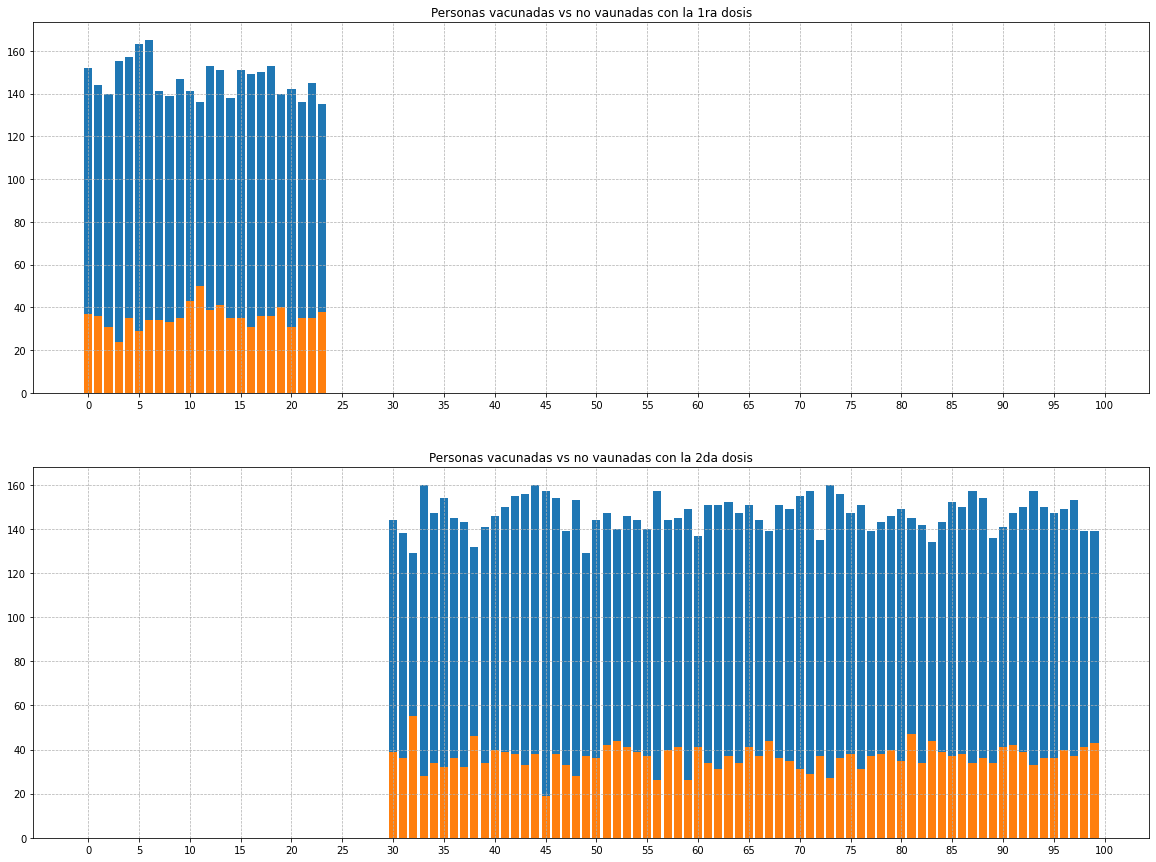

In [22]:
x = np.arange(len(vacunados1))
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
ax1.set_title('Personas vacunadas vs no vaunadas con la 1ra dosis')
ax1.bar(x, vacunados1)
ax1.bar(x, no_vacunados1)
ax1.grid(linestyle='--', linewidth=0.7)
ax1.set_xticks(np.arange(0,101,5))
ax1.set_yticks(np.arange(0, 180, 20))

ax2.set_title('Personas vacunadas vs no vaunadas con la 2da dosis')
ax2.bar(x, vacunados2)
ax2.bar(x, no_vacunados2)
ax2.grid(linestyle='--', linewidth=0.7)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_yticks(np.arange(0, 180, 20))
fig.show()

[1] http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

[2] https://www.primicias.ec/noticias/sociedad/adultos-mayores-segunda-dosis/